In [1942]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.use('Agg')
plt.switch_backend('agg')

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve,auc

%matplotlib inline

sns.set(style = 'whitegrid')

np.random.seed(42)

In [1943]:
df = pd.read_csv('Fashion(Data Points) - Form responses 1.csv')

In [1944]:
df.head()

Timestamp   1.Age Group     2.Gender     3.Profession    \
0  14/01/2025 19:33:18           18–24       Female          Student   
1  21/01/2025 22:13:55           18–24       Female          Student   
2  21/01/2025 22:24:31           18–24       Female          Student   
3  21/01/2025 22:25:53           18–24         Male          Student   
4  21/01/2025 22:38:46           18–24         Male          Student   

  Section 2: Style Preferences\n4. How would you describe your go-to daily outfit? (Select one)    \
0                     Chic (e.g., tailored, stylish)                                                
1                     Casual (e.g., jeans, t-shirts)                                                
2                     Casual (e.g., jeans, t-shirts)                                                
3                     Casual (e.g., jeans, t-shirts)                                                
4                     Casual (e.g., jeans, t-shirts)                                                

   5. What’s your favorite color palette for clothing?    \
0                     Pastels (soft pink, baby blue)       
1                          Dark tones (navy, maroon)       
2                      Neutral (black, white, beige)       
3                      Neutral (black, white, beige)       
4                      Neutral (black, white, beige)       

   6. Do you prioritize functionality or aesthetics in your outfits?    \
0                         Slightly prefer aesthetics                     
1                      Slightly prefer functionality                     
2                      Slightly prefer functionality                     
3                              Equal balance of both                     
4                         Slightly prefer aesthetics                     

    7.Which of these best describes your wardrobe?    \
0                      Mix-and-match (varied styles)   
1                      Mix-and-match (varied styles)   
2                  Minimalist (few versatile pieces)   
3                Specialized (specific to one style)   
4                  Minimalist (few versatile pieces)   

  Section 3: Shopping Habits\n8. How often do you shop for new clothes?    \
0                                             Rarely                        
1                                   Every few months                        
2                                            Monthly                        
3                                   Every few months                        
4                                             Rarely                        

    9.What influences your clothing purchases the most?    \
0                                            Comfort        
1                                     Sustainability        
2                                            Comfort        
3                                            Comfort        
4                                            Comfort        

   10. Where do you typically shop for clothes? (Select all that apply)    \
0                                    Local boutiques                        
1                                      Thrift stores                        
2                                    Local boutiques                        
3                                      Thrift stores                        
4                                      Thrift stores                        

  Section 4: Lifestyle\n11. How often do you attend formal events?    \
0                - Occasionally (a few times a year)                   
1                - Occasionally (a few times a year)                   
2                - Occasionally (a few times a year)                   
3                   - Rarely (less than once a year)                   
4                - Occasionally (a few times a year)                   

    12.Do you often experiment with new styles or stick to what you know?    \
0                        

In [1945]:
df.shape

(150, 20)

In [1946]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 20 columns):
 #   Column                                                                                          Non-Null Count  Dtype  
---  ------                                                                                          --------------  -----  
 0   Timestamp                                                                                       150 non-null    object 
 1     1.Age Group                                                                                   150 non-null    object 
 2     2.Gender                                                                                      150 non-null    object 
 3     3.Profession                                                                                  150 non-null    object 
 4   Section 2: Style Preferences
4. How would you describe your go-to daily outfit? (Select one)    149 non-null    object 
 5    5. What’s your

In [1947]:
df.columns = df.columns.str.strip()

In [1948]:
df.head(1)

Timestamp 1.Age Group 2.Gender 3.Profession  \
0  14/01/2025 19:33:18       18–24   Female      Student   

  Section 2: Style Preferences\n4. How would you describe your go-to daily outfit? (Select one)  \
0                     Chic (e.g., tailored, stylish)                                              

  5. What’s your favorite color palette for clothing?  \
0                     Pastels (soft pink, baby blue)    

  6. Do you prioritize functionality or aesthetics in your outfits?  \
0                         Slightly prefer aesthetics                  

  7.Which of these best describes your wardrobe?  \
0                  Mix-and-match (varied styles)   

  Section 3: Shopping Habits\n8. How often do you shop for new clothes?  \
0                                             Rarely                      

  9.What influences your clothing purchases the most?  \
0                                            Comfort    

  10. Where do you typically shop for clothes? (Select all that apply)  \
0                                    Local boutiques                     

  Section 4: Lifestyle\n11. How often do you attend formal events?  \
0                - Occasionally (a few times a year)                 

  12.Do you often experiment with new styles or stick to what you know?  \
0                               Sometimes experiment                      

  13. What kind of footwear do you wear most often?  \
0                                          Sneakers   

  14. How active is your daily lifestyle?  \
0                        Mostly sedentary   

  Section 5: Personal Preferences\n15. How important is comfort in your clothing choices  \
0                              - Extremely important                                       

  16.If you had to choose, would you prefer timeless pieces or trendy items?  \
0                       Mostly trendy, some timeless                           

   17. From scale 1-10 how much do you think your clothing style reflects about your personality?  \
0                                                8.0                                                

   Section 2: Style Preferences  Column 18  
0                           NaN        NaN

In [1949]:
# renaming the column names
df = df.rename(columns={
    '1.Age Group': "Age Group",
    '2.Gender': 'Gender',
    '3.Profession': 'Profession',
    'Section 2: Style Preferences\n4. How would you describe your go-to daily outfit? (Select one)': 'Style Preferences',
    '5. What’s your favorite color palette for clothing?':'Favourite colour',
    '6. Do you prioritize functionality or aesthetics in your outfits?': 'priority',
    '7.Which of these best describes your wardrobe?': 'wardrobe description',
    'Section 3: Shopping Habits\n8. How often do you shop for new clothes?': 'shopping habits',
    '9.What influences your clothing purchases the most?': 'influence',
    '10. Where do you typically shop for clothes? (Select all that apply)':'Shopping place',
    'Section 4: Lifestyle\n11. How often do you attend formal events?': 'lifestyle',
    '12.Do you often experiment with new styles or stick to what you know?': 'style experiments',
    '13. What kind of footwear do you wear most often?':'footwear_type',
    '14. How active is your daily lifestyle?': 'activity',
    'Section 5: Personal Preferences\n15. How important is comfort in your clothing choices': 'personnel preferences',
    '16.If you had to choose, would you prefer timeless pieces or trendy items?':'trendy items selection',
    '17. From scale 1-10 how much do you think your clothing style reflects about your personality?': 'scaling'
})

In [1950]:
df.head()

Timestamp Age Group  Gender Profession  \
0  14/01/2025 19:33:18     18–24  Female    Student   
1  21/01/2025 22:13:55     18–24  Female    Student   
2  21/01/2025 22:24:31     18–24  Female    Student   
3  21/01/2025 22:25:53     18–24    Male    Student   
4  21/01/2025 22:38:46     18–24    Male    Student   

                Style Preferences                Favourite colour  \
0  Chic (e.g., tailored, stylish)  Pastels (soft pink, baby blue)   
1  Casual (e.g., jeans, t-shirts)       Dark tones (navy, maroon)   
2  Casual (e.g., jeans, t-shirts)   Neutral (black, white, beige)   
3  Casual (e.g., jeans, t-shirts)   Neutral (black, white, beige)   
4  Casual (e.g., jeans, t-shirts)   Neutral (black, white, beige)   

                        priority                 wardrobe description  \
0     Slightly prefer aesthetics        Mix-and-match (varied styles)   
1  Slightly prefer functionality        Mix-and-match (varied styles)   
2  Slightly prefer functionality    Minimalist (few versatile pieces)   
3          Equal balance of both  Specialized (specific to one style)   
4     Slightly prefer aesthetics    Minimalist (few versatile pieces)   

    shopping habits       influence   Shopping place  \
0            Rarely         Comfort  Local boutiques   
1  Every few months  Sustainability    Thrift stores   
2           Monthly         Comfort  Local boutiques   
3  Every few months         Comfort    Thrift stores   
4            Rarely         Comfort    Thrift stores   

                             lifestyle     style experiments  footwear_type  \
0  - Occasionally (a few times a year)  Sometimes experiment       Sneakers   
1  - Occasionally (a few times a year)  Sometimes experiment  Sandals/Flats   
2  - Occasionally (a few times a year)     Rarely experiment       Sneakers   
3     - Rarely (less than once a year)  Sometimes experiment       Sneakers   
4  - Occasionally (a few times a year)     Rarely experiment       Sneakers   

                                      activity  personnel preferences  \
0                             Mostly sedentary  - Extremely important   
1                            Moderately active   - Somewhat important   
2                            Moderately active  - Extremely important   
3  Very active (e.g., gym, outdoor activities)   - Somewhat important   
4  Very active (e.g., gym, outdoor activities)   - Somewhat important   

         trendy items selection  scaling  Section 2: Style Preferences  \
0  Mostly trendy, some timeless      8.0                           NaN   
1  Mostly timeless, some trendy      6.0                           NaN   
2  Mostly timeless, some trendy      9.0                           NaN   
3               Always timeless      6.0                           NaN   
4  Mostly timeless, some trendy      6.0                           NaN   

   Column 18  
0        NaN  
1        NaN  
2        NaN  
3        NaN  
4        NaN

In [1951]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])


In [1952]:
df.isnull().sum()

Timestamp                         0
Age Group                         0
Gender                            0
Profession                        0
Style Preferences                 1
Favourite colour                  0
priority                          1
wardrobe description              2
shopping habits                   1
influence                         2
Shopping place                    2
lifestyle                         2
style experiments                 2
footwear_type                     2
activity                          2
personnel preferences             2
trendy items selection            4
scaling                           3
Section 2: Style Preferences    150
Column 18                       150
dtype: int64

In [1953]:
df.drop('Section 2: Style Preferences', axis = 1, inplace = True)
df.drop('Column 18', axis = 1, inplace = True)

In [1954]:
df.dropna(inplace = True)

In [1955]:
df.isnull().sum()

Timestamp                 0
Age Group                 0
Gender                    0
Profession                0
Style Preferences         0
Favourite colour          0
priority                  0
wardrobe description      0
shopping habits           0
influence                 0
Shopping place            0
lifestyle                 0
style experiments         0
footwear_type             0
activity                  0
personnel preferences     0
trendy items selection    0
scaling                   0
dtype: int64

In [1956]:
categorical  = df.select_dtypes(include = 'object')
numerical = df.select_dtypes(include = 'float64')

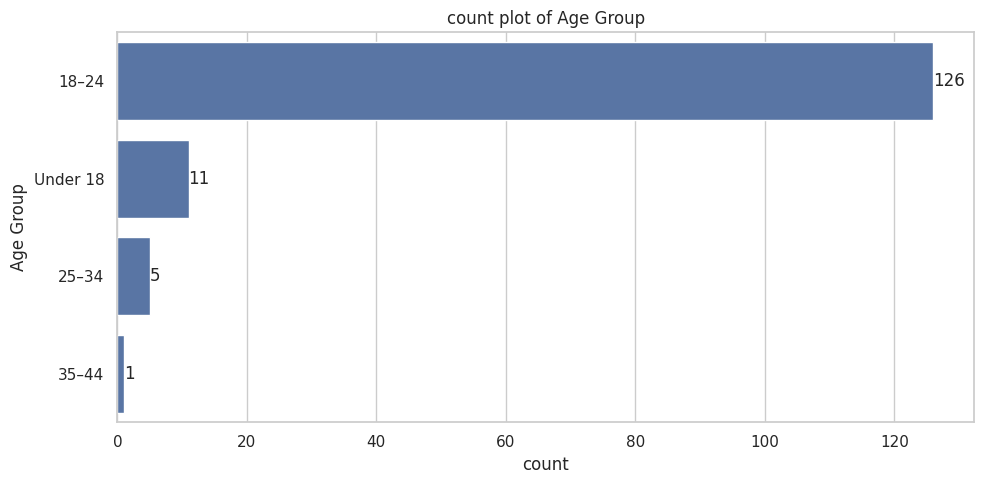

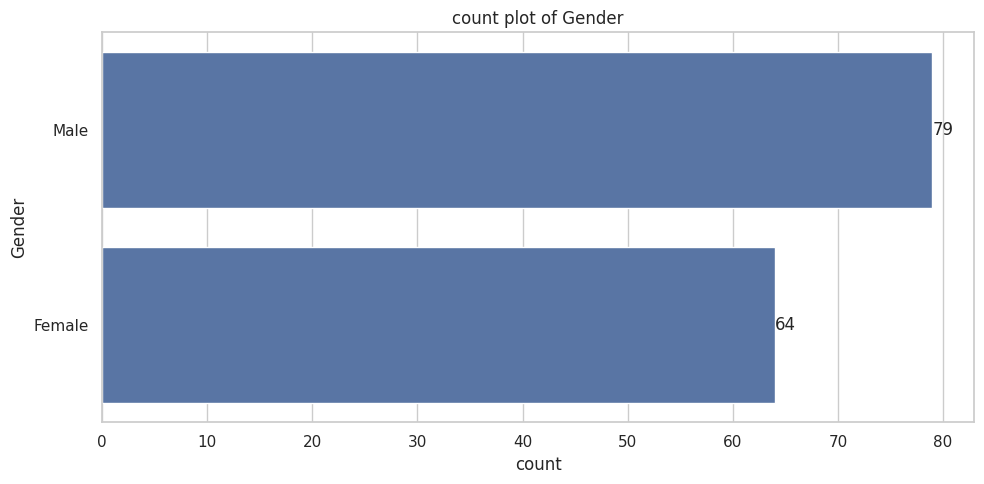

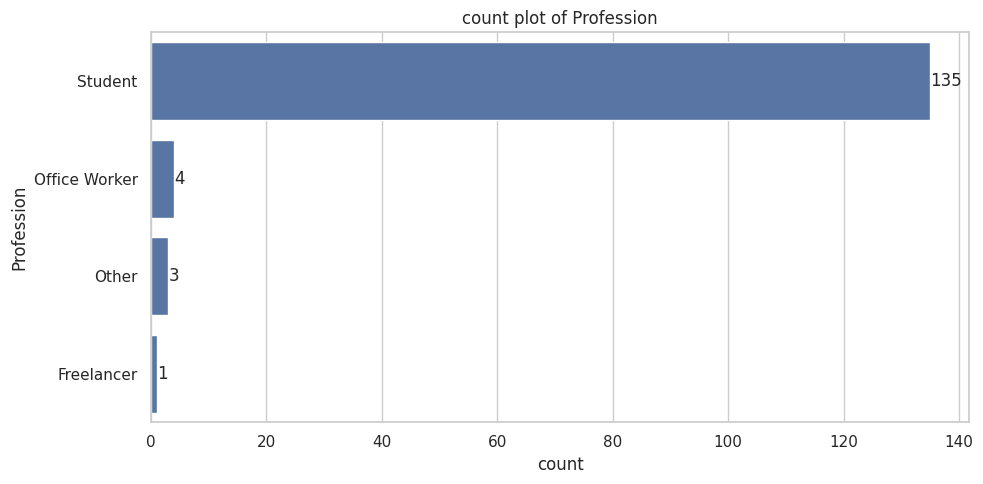

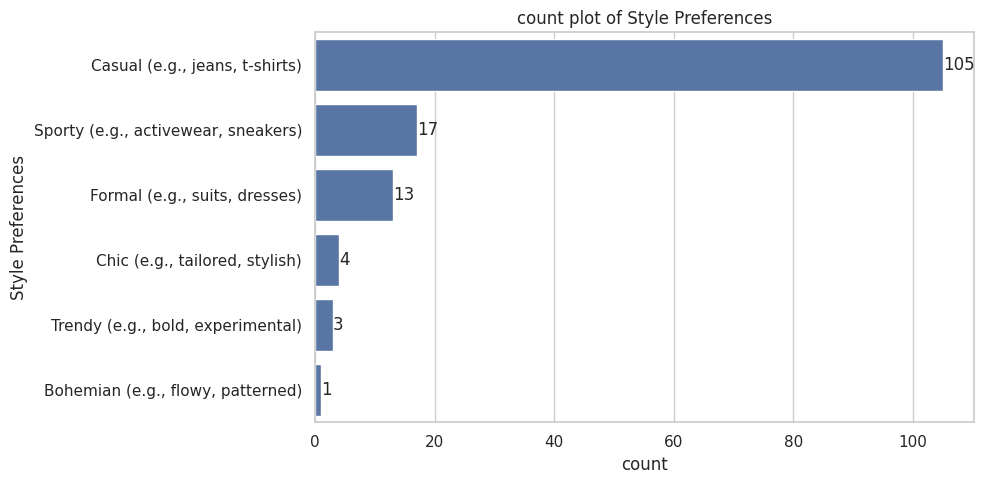

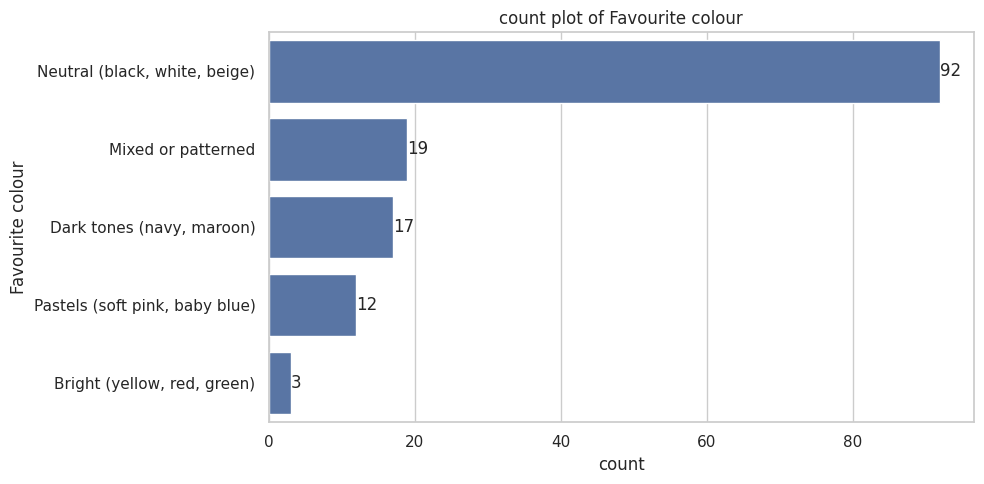

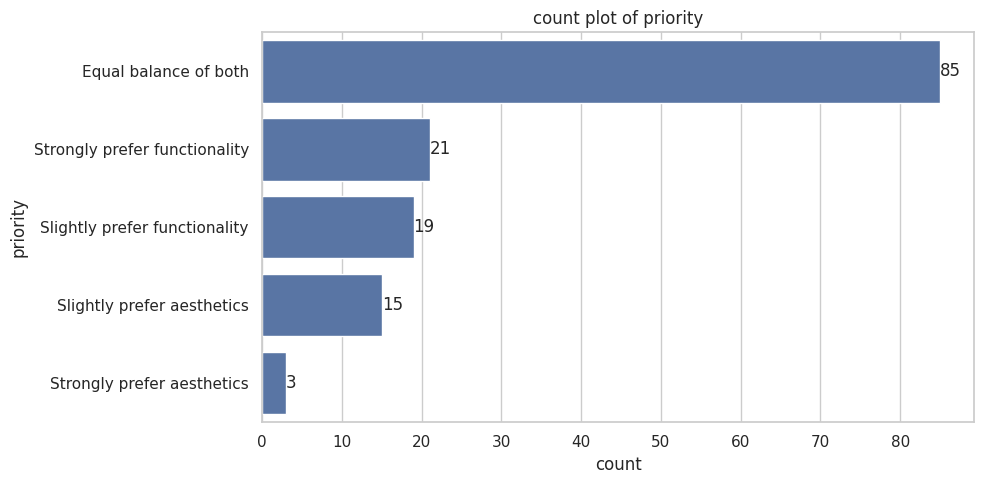

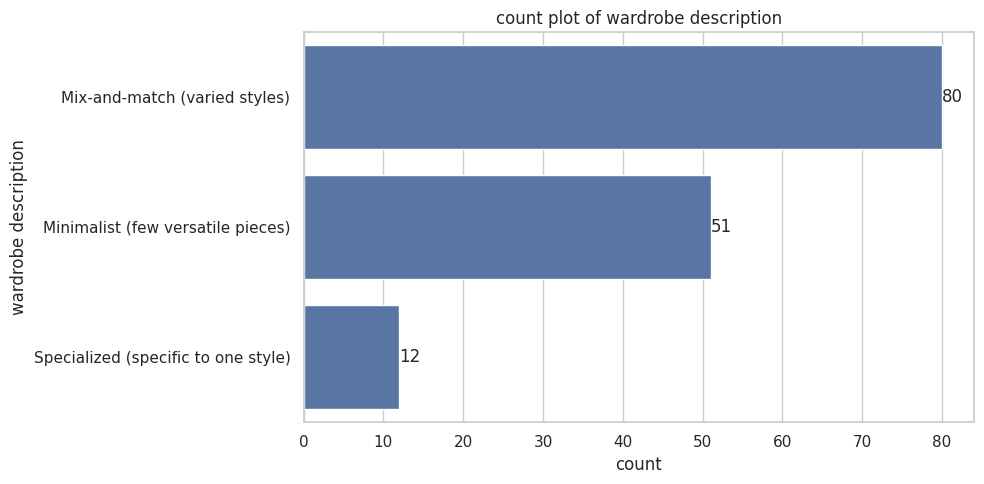

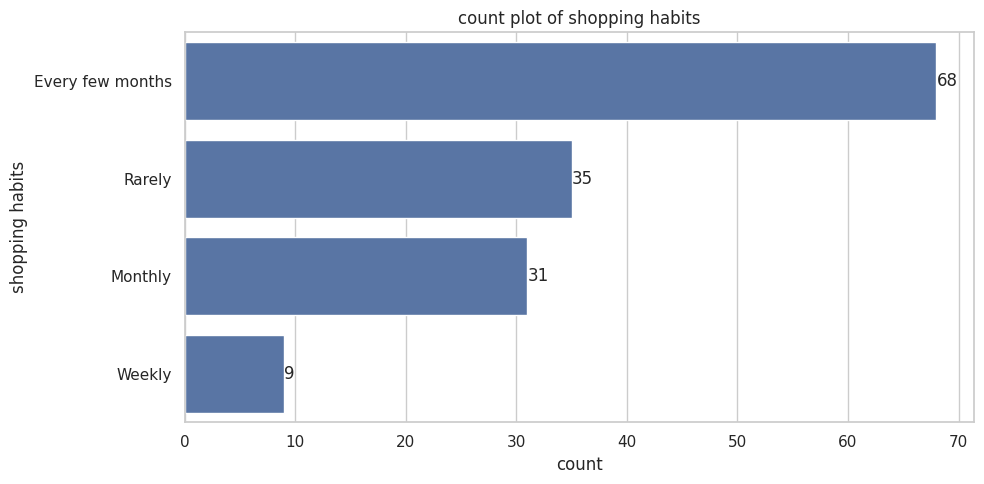

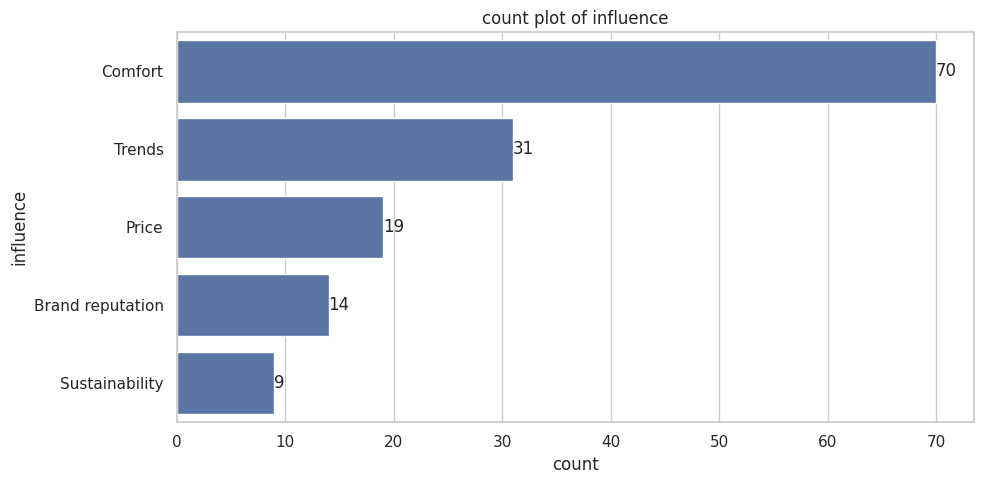

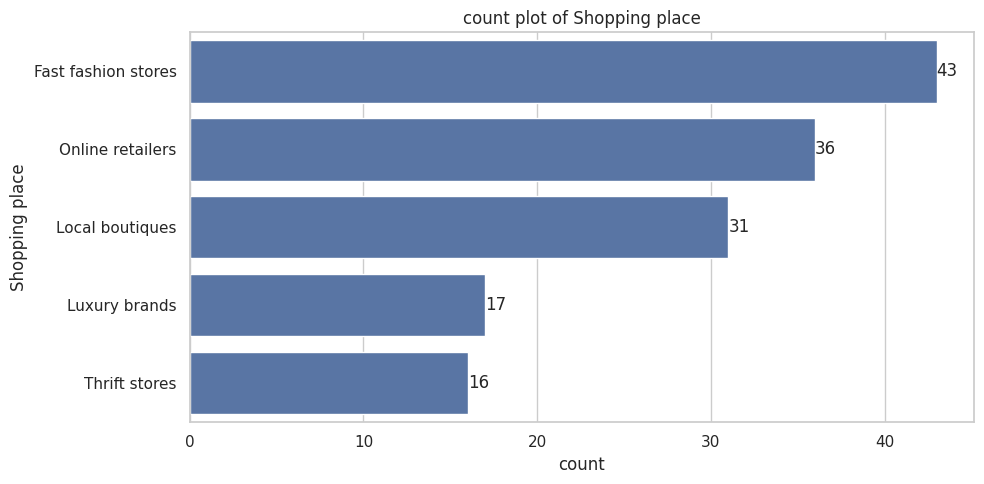

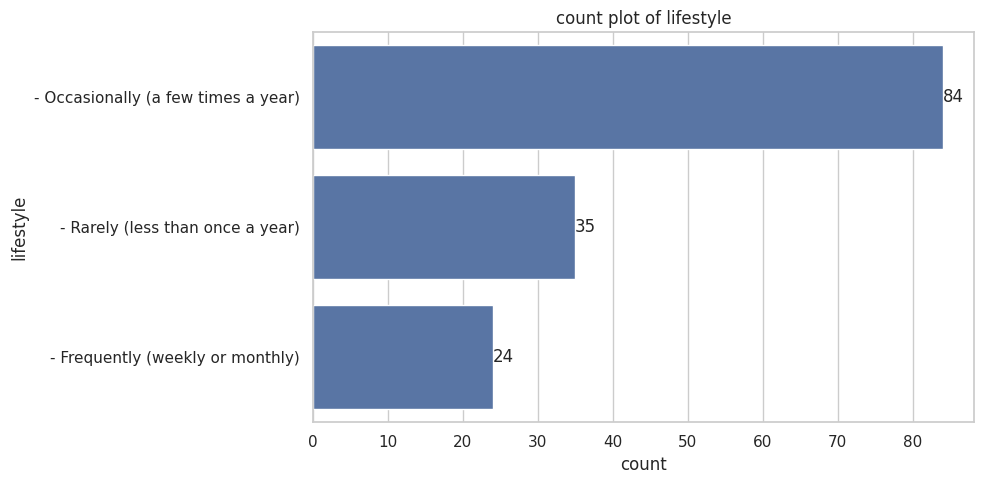

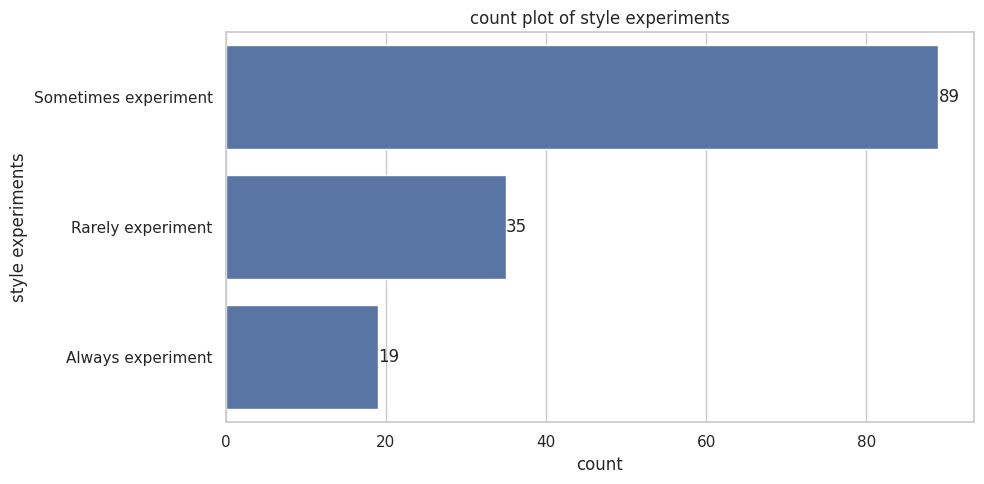

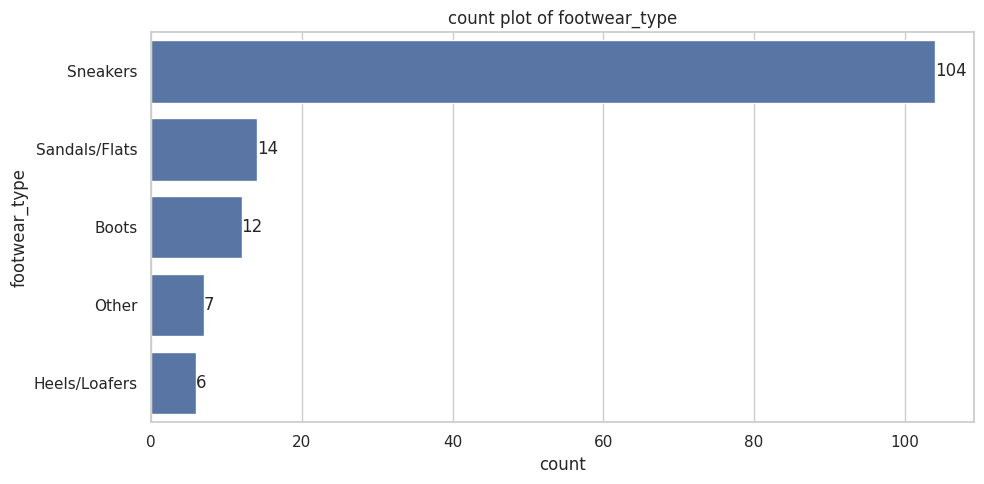

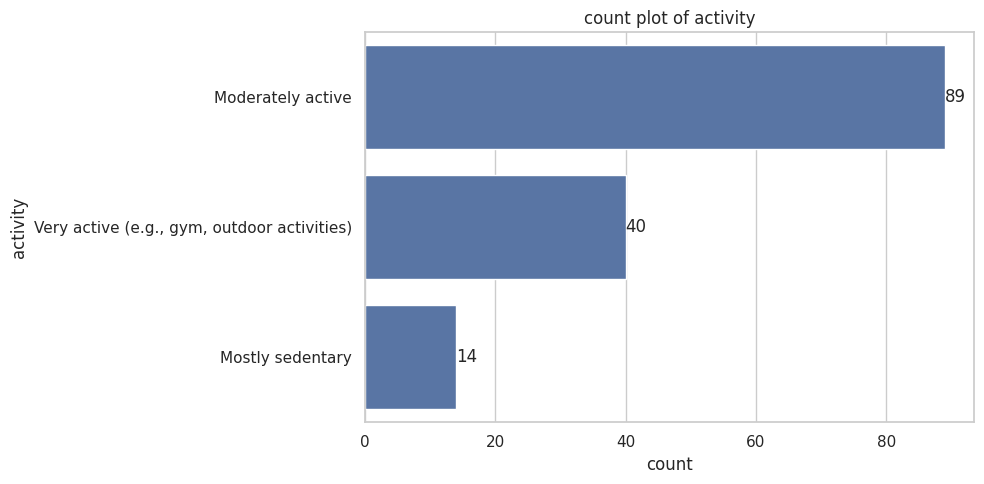

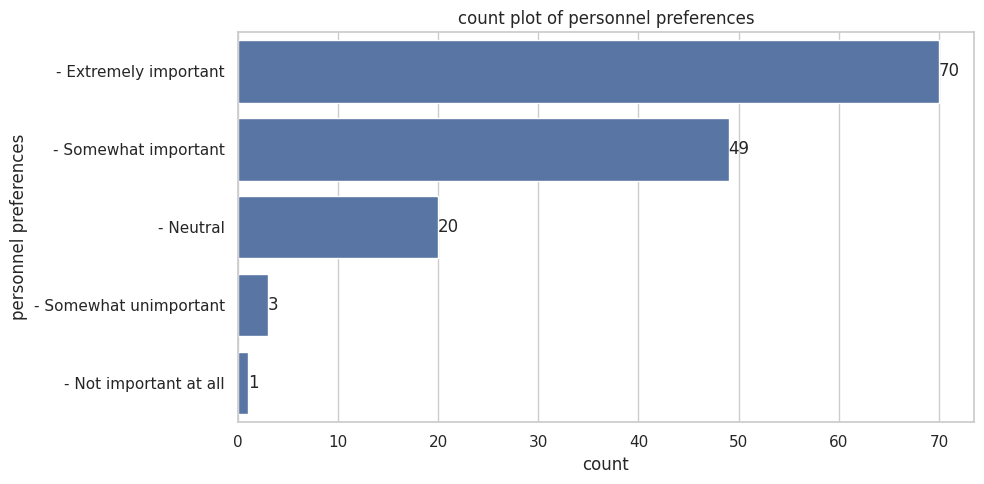

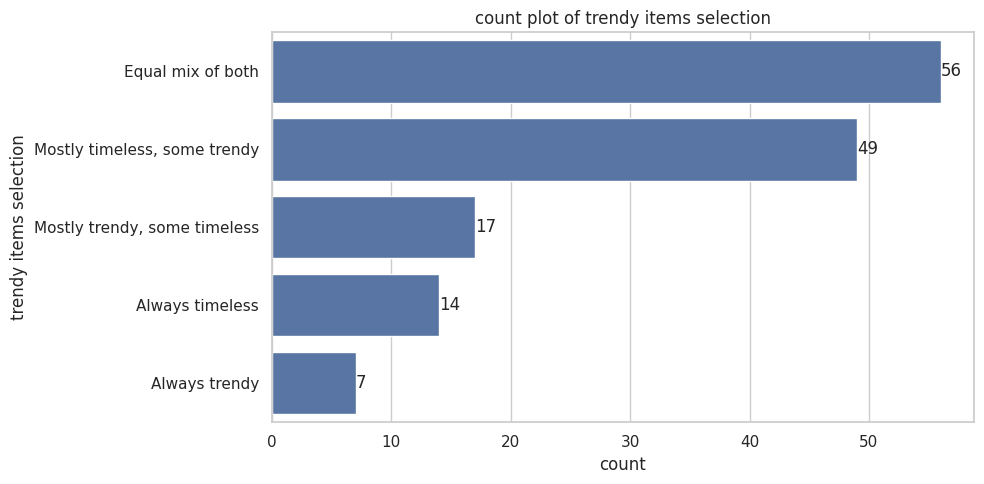

In [1957]:
for col in categorical:
  plt.figure(figsize = (10,5))
  ax = sns.countplot(y = col, data = df, order = df[col].value_counts().index)
  ax.bar_label(ax.containers[0])
  plt.title(f'count plot of {col}')
  plt.tight_layout()
  plt.show()

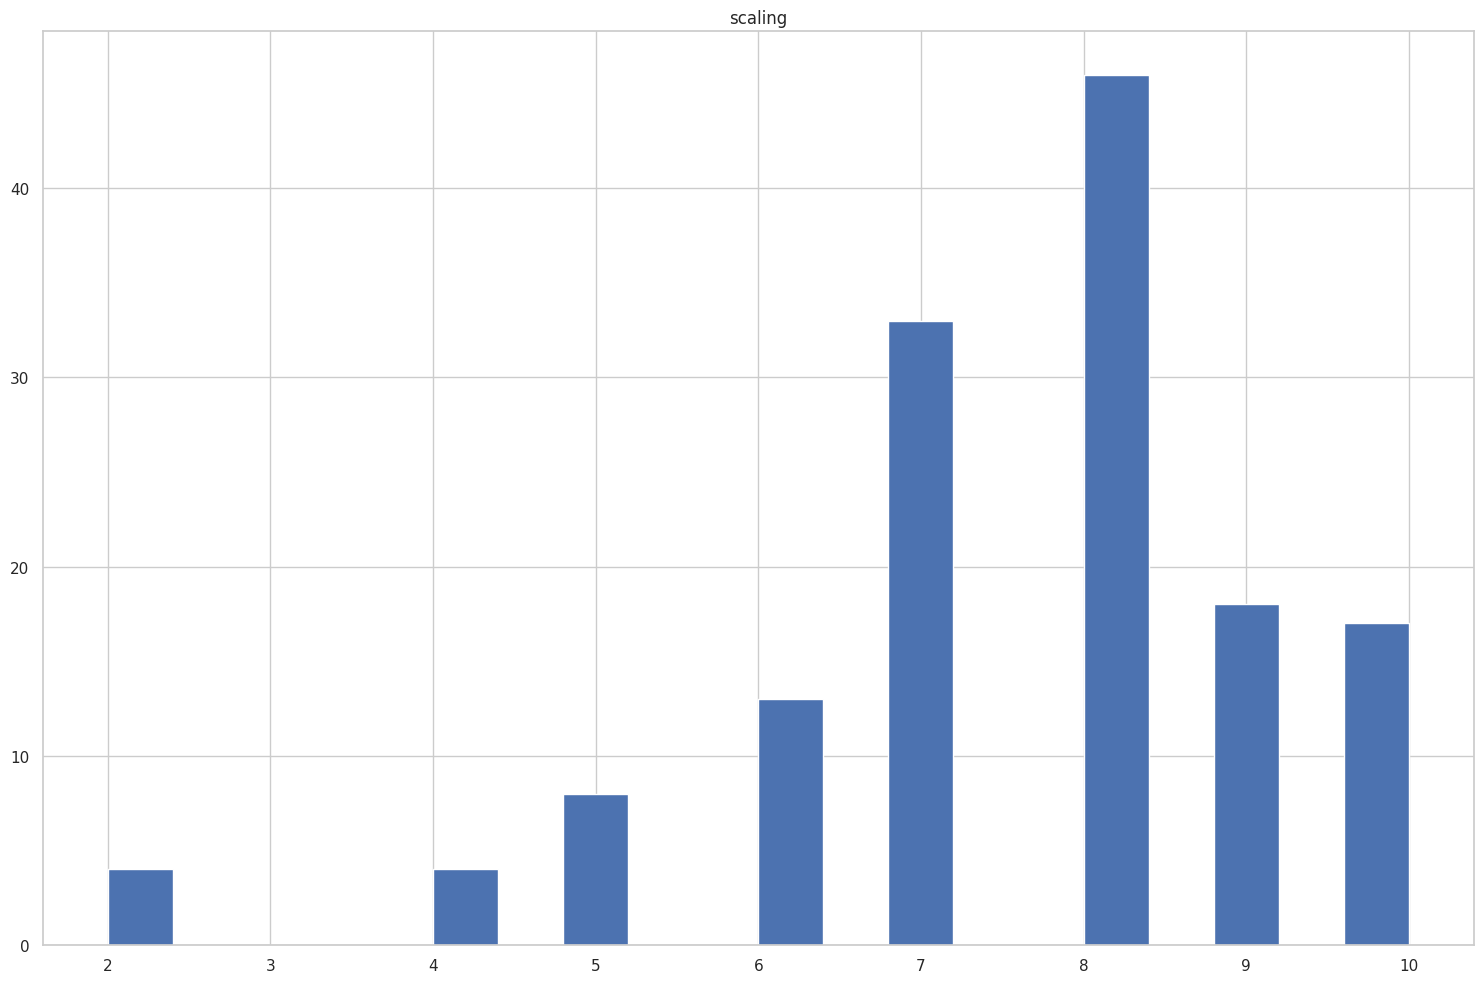

In [1958]:
if numerical.shape[1]>0:
  numerical.hist(figsize = (15,10),bins = 20)
  plt.tight_layout()
  plt.show()


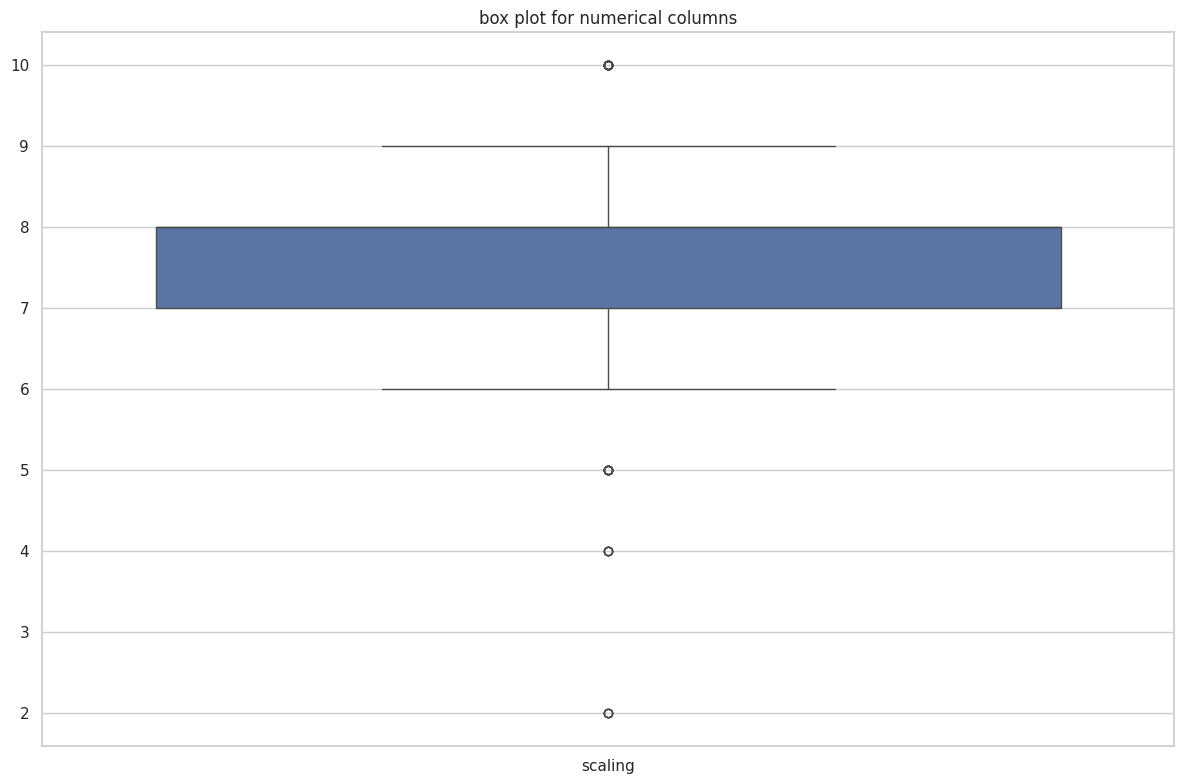

In [1959]:
if numerical.shape[1]>0:
  plt.figure(figsize= (12,8))
  sns.boxplot(data = numerical)
  plt.title("box plot for numerical columns")
  plt.tight_layout()
  plt.show()

In [1960]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143 entries, 0 to 149
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Timestamp               143 non-null    datetime64[ns]
 1   Age Group               143 non-null    object        
 2   Gender                  143 non-null    object        
 3   Profession              143 non-null    object        
 4   Style Preferences       143 non-null    object        
 5   Favourite colour        143 non-null    object        
 6   priority                143 non-null    object        
 7   wardrobe description    143 non-null    object        
 8   shopping habits         143 non-null    object        
 9   influence               143 non-null    object        
 10  Shopping place          143 non-null    object        
 11  lifestyle               143 non-null    object        
 12  style experiments       143 non-null    object        


In [1961]:
target_column = 'scaling'
if target_column not in df.columns:
  raise ValueError(f"Target column '{target_column}' not found in the DataFrame.")

In [1962]:
predicting_columns = ['Age Group','Gender','Profession']

In [1963]:
for col in predicting_columns:
  if col not in df.columns:
    raise ValueError(f"Predicting column '{col}' not found in the DataFrame.")

In [1964]:
df_model = df[predicting_columns + [target_column]]

In [1965]:
df_model.head()

Age Group  Gender Profession  scaling
0     18–24  Female    Student      8.0
1     18–24  Female    Student      6.0
2     18–24  Female    Student      9.0
3     18–24    Male    Student      6.0
4     18–24    Male    Student      6.0

In [1966]:
df_model = pd.get_dummies(df_model, drop_first = True)

In [1967]:
df_model.head()

scaling  Age Group_25–34  Age Group_35–44  Age Group_Under 18  Gender_Male  \
0      8.0            False            False               False        False   
1      6.0            False            False               False        False   
2      9.0            False            False               False        False   
3      6.0            False            False               False         True   
4      6.0            False            False               False         True   

   Profession_Office Worker  Profession_Other  Profession_Student  
0                     False             False                True  
1                     False             False                True  
2                     False             False                True  
3                     False             False                True  
4                     False             False                True

In [1968]:
for col in df_model.columns:
  # Check if the column's data type is boolean
  if df_model[col].dtype == bool:
    # Apply the mapping from True/False to 1/0
    df_model[col] = df_model[col].map({True: 1, False: 0})

In [1969]:
df_model.head()

scaling  Age Group_25–34  Age Group_35–44  Age Group_Under 18  Gender_Male  \
0      8.0                0                0                   0            0   
1      6.0                0                0                   0            0   
2      9.0                0                0                   0            0   
3      6.0                0                0                   0            1   
4      6.0                0                0                   0            1   

   Profession_Office Worker  Profession_Other  Profession_Student  
0                         0                 0                   1  
1                         0                 0                   1  
2                         0                 0                   1  
3                         0                 0                   1  
4                         0                 0                   1

In [1970]:
X = df_model.drop(target_column, axis = 1)
y = df_model[target_column]

In [1971]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [1972]:
clf = RandomForestClassifier(n_estimators = 100,random_state = 42)
clf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [1973]:
y_pred = clf.predict(X_test)

In [1974]:
acc = accuracy_score(y_test,y_pred)
print(f'Accuracy of the model is {acc}')

Accuracy of the model is 0.3793103448275862


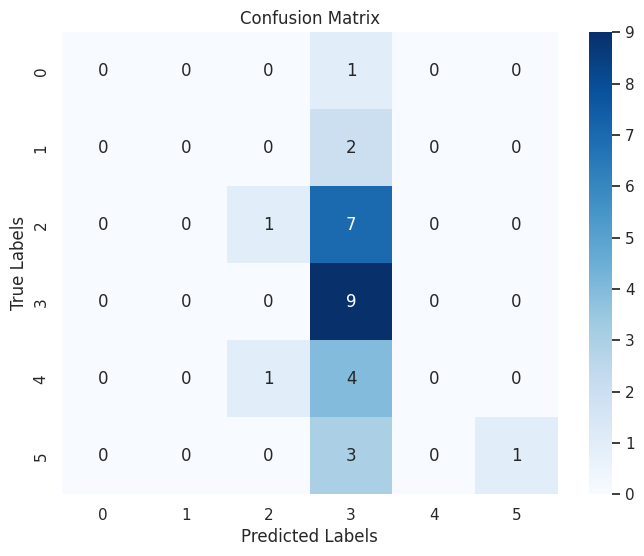

In [1975]:
#confusion matrix
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize = (8,6))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

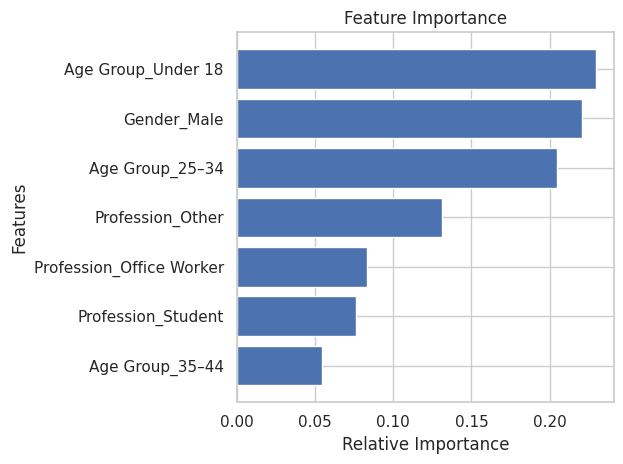

In [1976]:
importances = clf.feature_importances_
indices = np.argsort(importances)
plt.barh(range(len(indices)), importances[indices], align = 'center')
plt.yticks(range(len(indices)), X.columns[indices])
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

Accuracy of the model is 0.27586206896551724


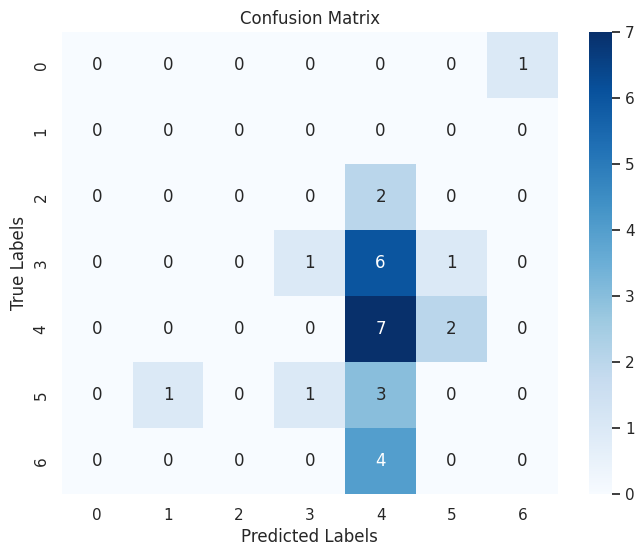

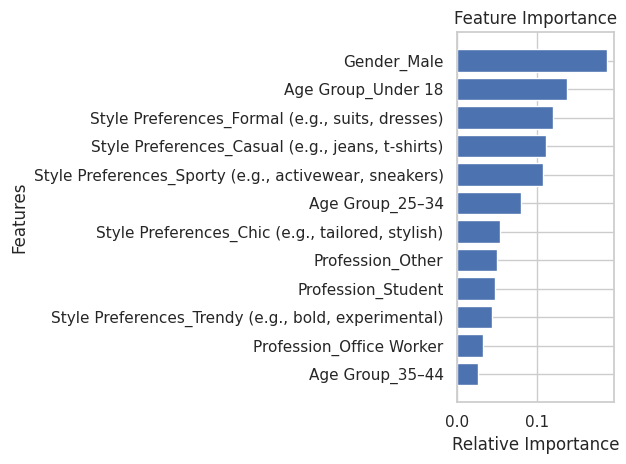

In [1977]:
predicting_columns = ['Age Group','Gender','Profession', 'Style Preferences']
df_model = df[predicting_columns + [target_column]]
df_model = pd.get_dummies(df_model, drop_first = True)
for col in df_model.columns:
  # Check if the column's data type is boolean
  if df_model[col].dtype == bool:
    # Apply the mapping from True/False to 1/0
    df_model[col] = df_model[col].map({True: 1, False: 0})
X = df_model.drop(target_column, axis = 1)
y = df_model[target_column]
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
clf = RandomForestClassifier(n_estimators = 100,random_state = 42)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print(f'Accuracy of the model is {acc}')


cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize = (8,6))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

importances = clf.feature_importances_
indices = np.argsort(importances)
plt.barh(range(len(indices)), importances[indices], align = 'center')
plt.yticks(range(len(indices)), X.columns[indices])
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()




In [1978]:
df.columns

Index(['Timestamp', 'Age Group', 'Gender', 'Profession', 'Style Preferences',
       'Favourite colour', 'priority', 'wardrobe description',
       'shopping habits', 'influence', 'Shopping place', 'lifestyle',
       'style experiments', 'footwear_type', 'activity',
       'personnel preferences', 'trendy items selection', 'scaling'],
      dtype='object')

In [1979]:
df['Favourite colour'].unique()

array(['Pastels (soft pink, baby blue)', 'Dark tones (navy, maroon)',
       'Neutral (black, white, beige)', 'Mixed or patterned',
       'Bright (yellow, red, green)'], dtype=object)

Accuracy of the model is 0.3448275862068966


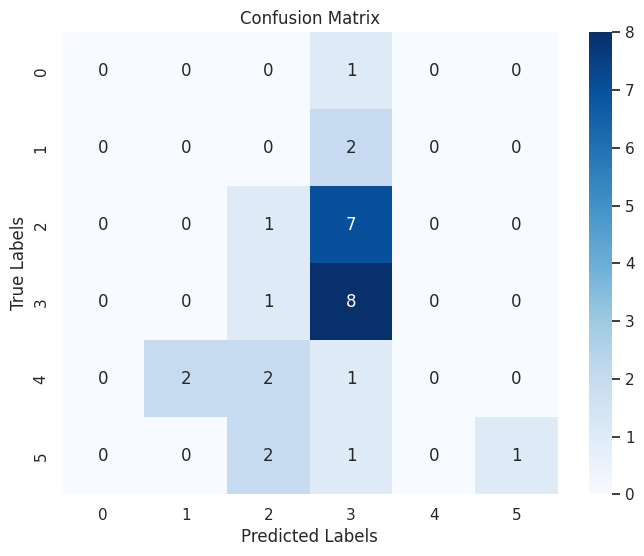

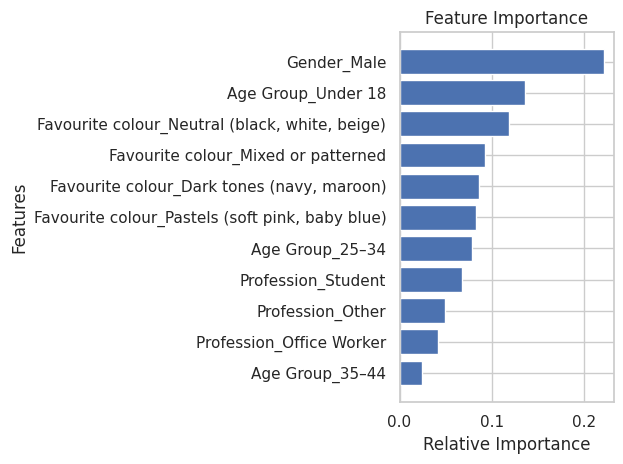

In [1980]:
predicting_columns = ['Age Group','Gender','Profession', 'Favourite colour']
df_model = df[predicting_columns + [target_column]]
df_model = pd.get_dummies(df_model, drop_first = True)
for col in df_model.columns:
  # Check if the column's data type is boolean
  if df_model[col].dtype == bool:
    # Apply the mapping from True/False to 1/0
    df_model[col] = df_model[col].map({True: 1, False: 0})
X = df_model.drop(target_column, axis = 1)
y = df_model[target_column]
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
clf = RandomForestClassifier(n_estimators = 100,random_state = 42)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print(f'Accuracy of the model is {acc}')


cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize = (8,6))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

importances = clf.feature_importances_
indices = np.argsort(importances)
plt.barh(range(len(indices)), importances[indices], align = 'center')
plt.yticks(range(len(indices)), X.columns[indices])
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()




In [1981]:
df = pd.read_excel('fashion_data_2018_2022.xls')

In [1982]:
df.head()

product_id    product_name  gender category     pattern  color age_group  \
0        1001    Biker Jacket    Male    Shirt   Geometric  White     25-35   
1        1002  Business Shirt    Male   Jacket  Polka Dots  Beige     18-24   
2        1003     Wool Jacket  Female    Dress   Geometric  Brown     18-24   
3        1004    Summer Dress    Male   Shorts       Plain  White     25-35   
4        1005    Casual Jeans    Male    Shirt       Plain  Beige     35-45   

   season   price   material  sales_count  reviews_count  average_rating  \
0  Spring   70.36  Synthetic           75             65             4.9   
1  Summer   91.59       Wool          296             25             3.5   
2     All  129.52       Wool           50             32             4.3   
3     All  116.01     Cotton          435             73             4.6   
4  Winter  125.48    Viscose           79             36             3.6   

   out_of_stock_times brand  discount last_stock_date  wish_list_count  \
0                   3  ZARA      0.20      2018-01-28              211   
1                   6  ZARA      0.00      2018-01-28              211   
2                   4  ZARA      0.05      2018-01-07               64   
3                   3  ZARA      0.10      2018-01-01              171   
4                   4  ZARA      0.00      2018-01-28              126   

   month_of_sale  year_of_sale  
0              1          2018  
1              1          2018  
2              1          2018  
3              1          2018  
4              1          2018

In [1983]:
df.isnull().sum()

product_id            0
product_name          0
gender                0
category              0
pattern               0
color                 0
age_group             0
season                0
price                 0
material              0
sales_count           0
reviews_count         0
average_rating        0
out_of_stock_times    0
brand                 0
discount              0
last_stock_date       0
wish_list_count       0
month_of_sale         0
year_of_sale          0
dtype: int64

In [1984]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   product_id          660 non-null    int64         
 1   product_name        660 non-null    object        
 2   gender              660 non-null    object        
 3   category            660 non-null    object        
 4   pattern             660 non-null    object        
 5   color               660 non-null    object        
 6   age_group           660 non-null    object        
 7   season              660 non-null    object        
 8   price               660 non-null    float64       
 9   material            660 non-null    object        
 10  sales_count         660 non-null    int64         
 11  reviews_count       660 non-null    int64         
 12  average_rating      660 non-null    float64       
 13  out_of_stock_times  660 non-null    int64         

In [1985]:
categorical  = df.select_dtypes(include = 'object')
numerical = df.select_dtypes(exclude = ['object', 'datetime64[ns]'])

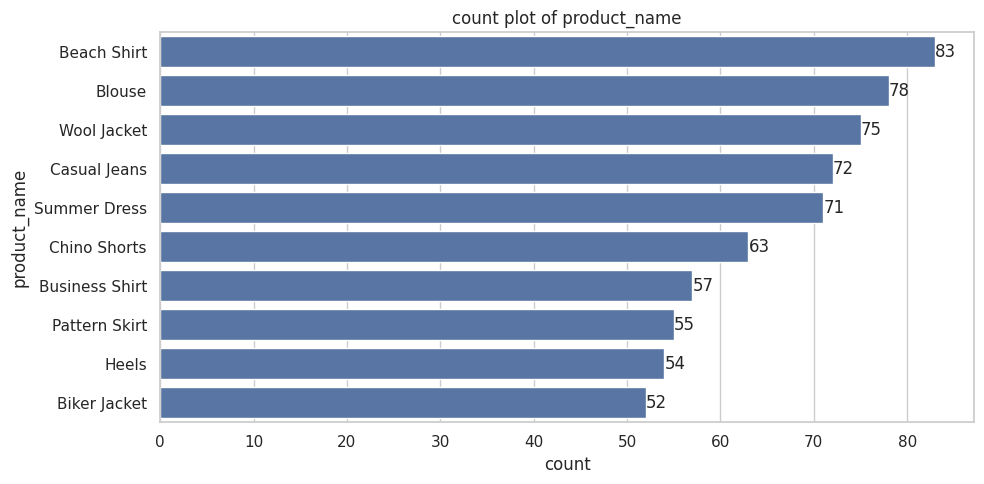

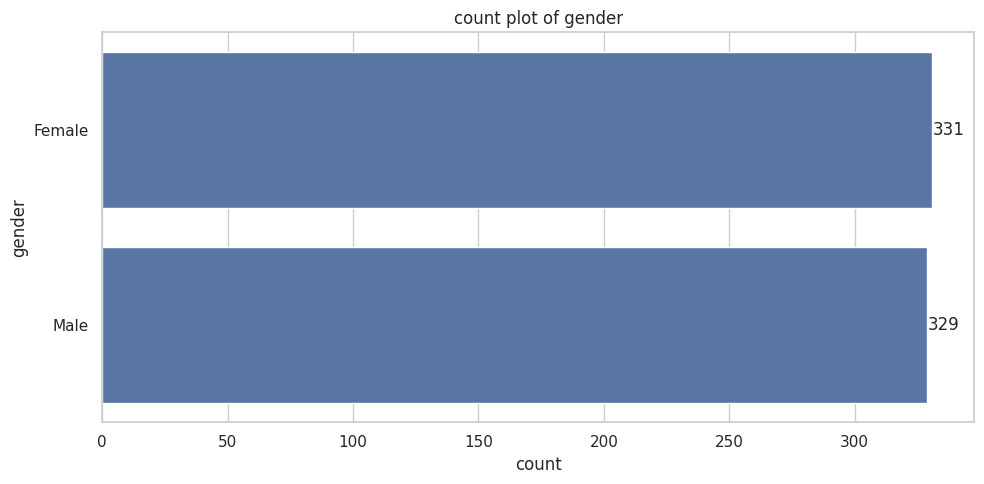

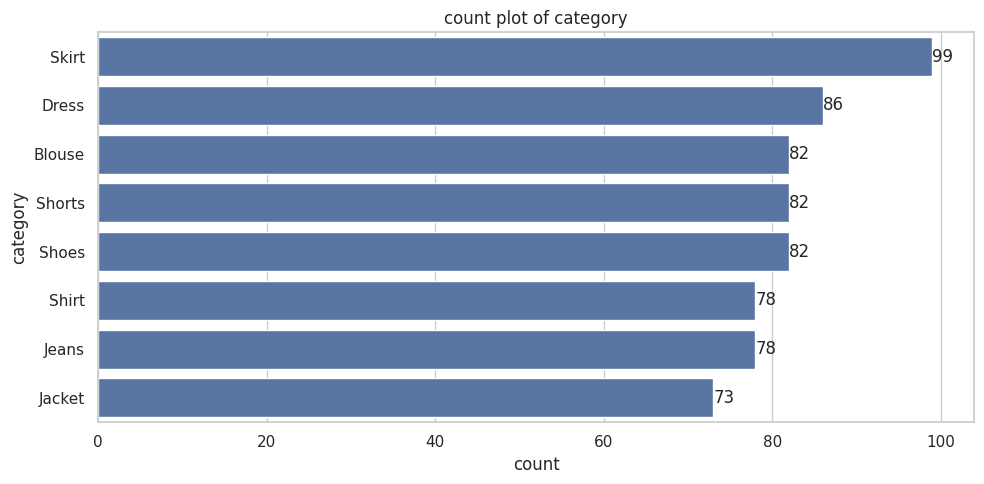

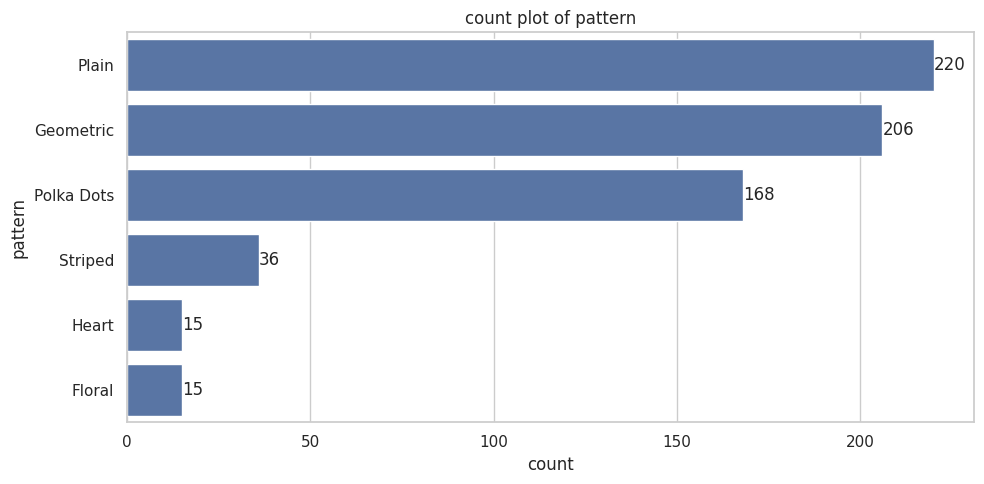

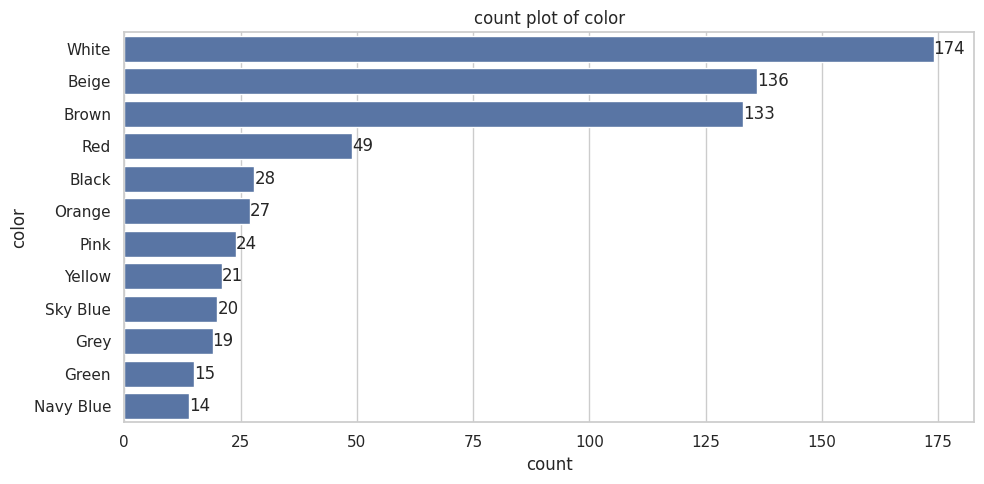

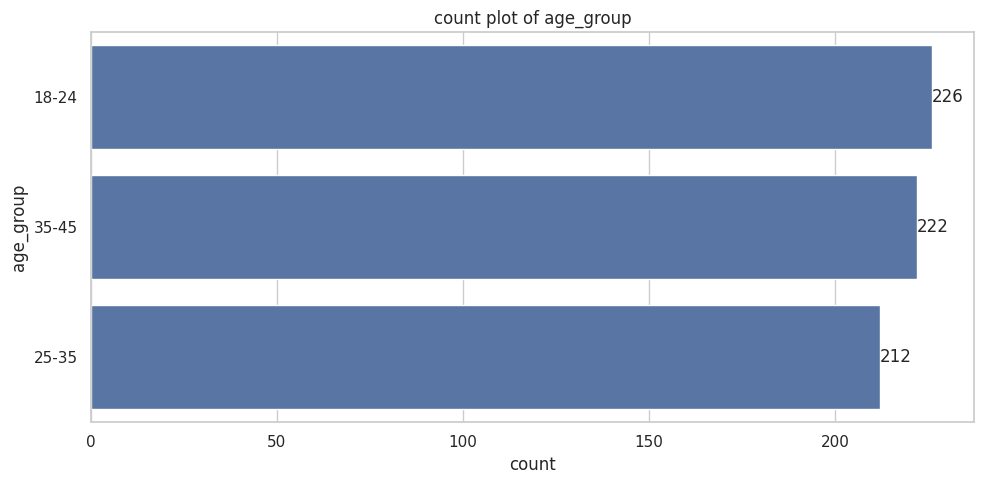

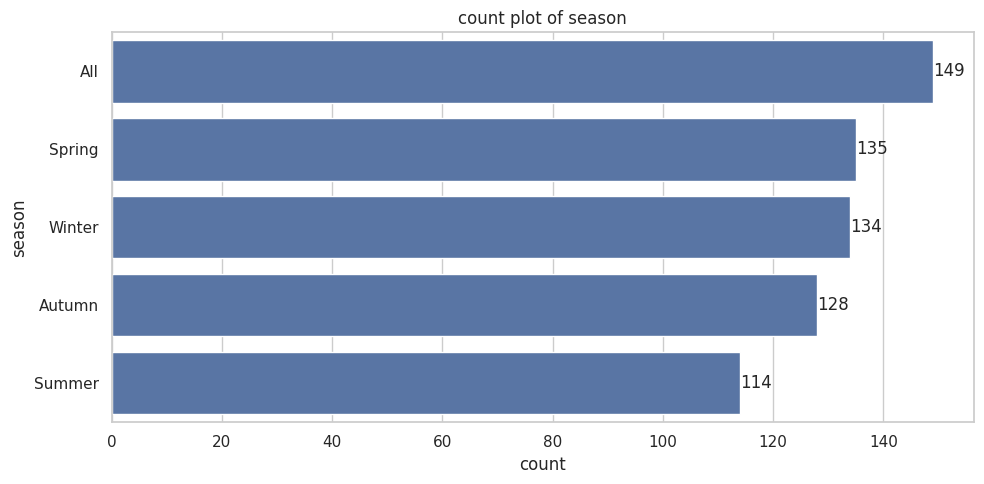

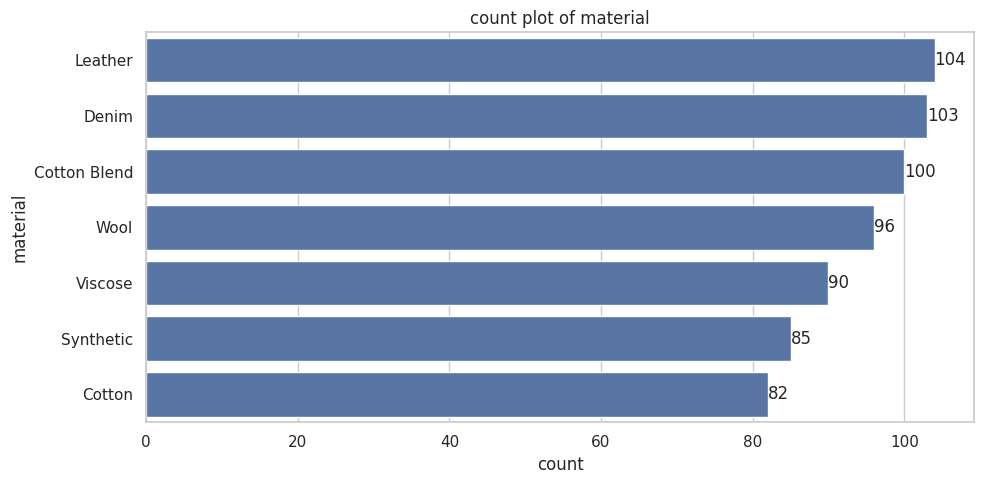

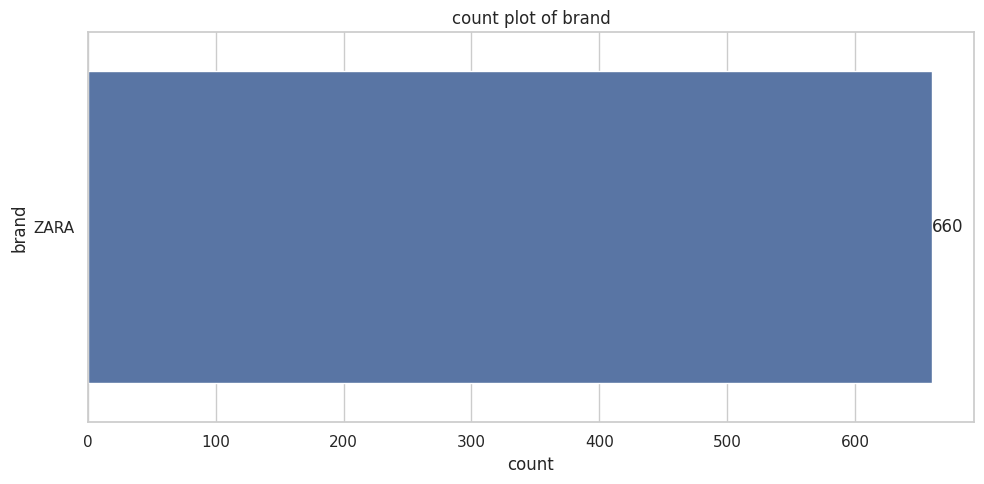

In [1986]:
# plot the count plot for categorical columns
for col in categorical:
  plt.figure(figsize = (10,5))
  ax = sns.countplot(y = col, data = df, order = df[col].value_counts().index)
  ax.bar_label(ax.containers[0])
  plt.title(f'count plot of {col}')
  plt.tight_layout()
  plt.show()

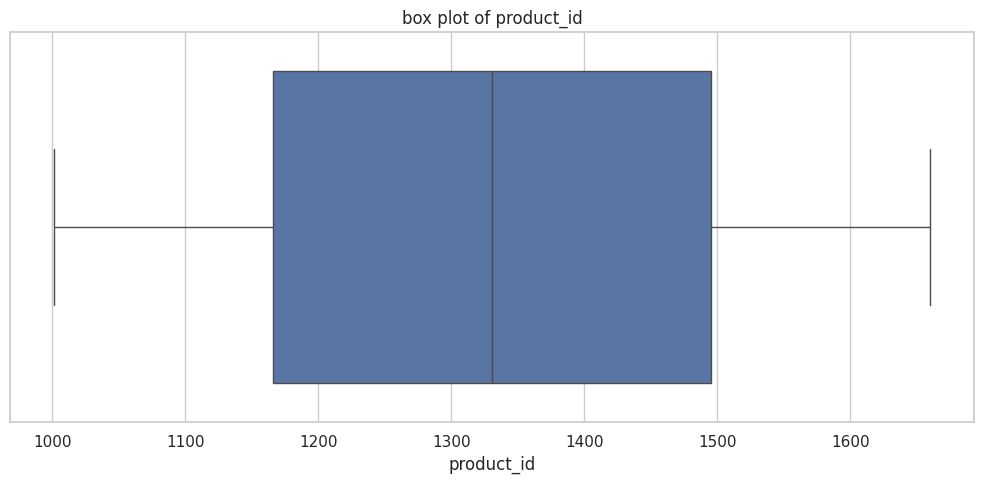

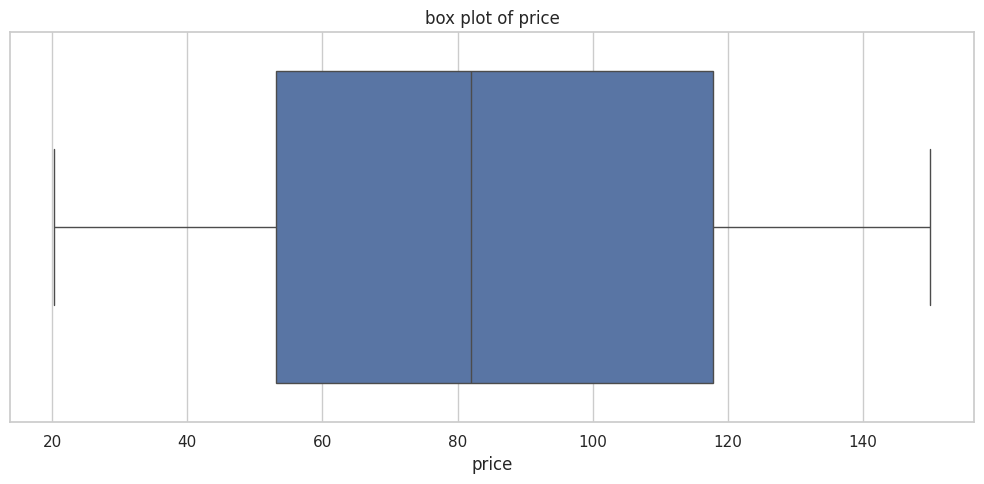

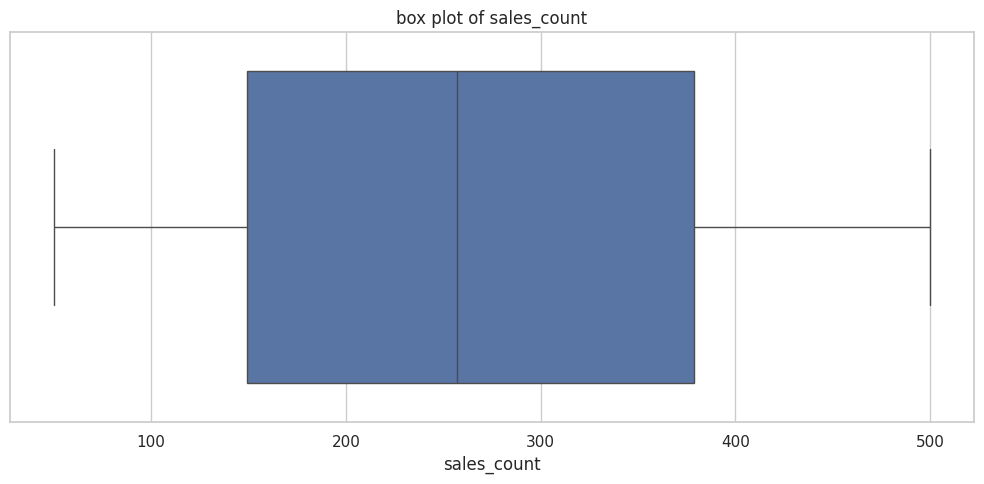

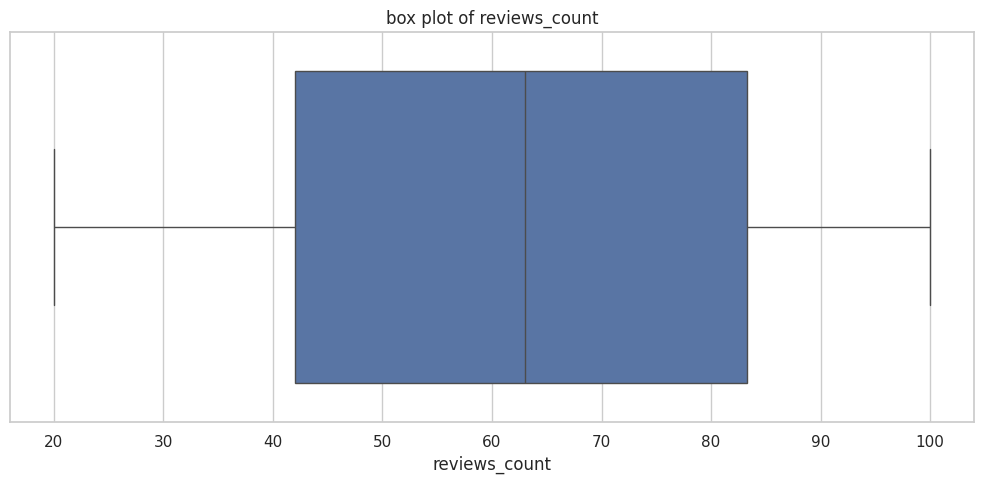

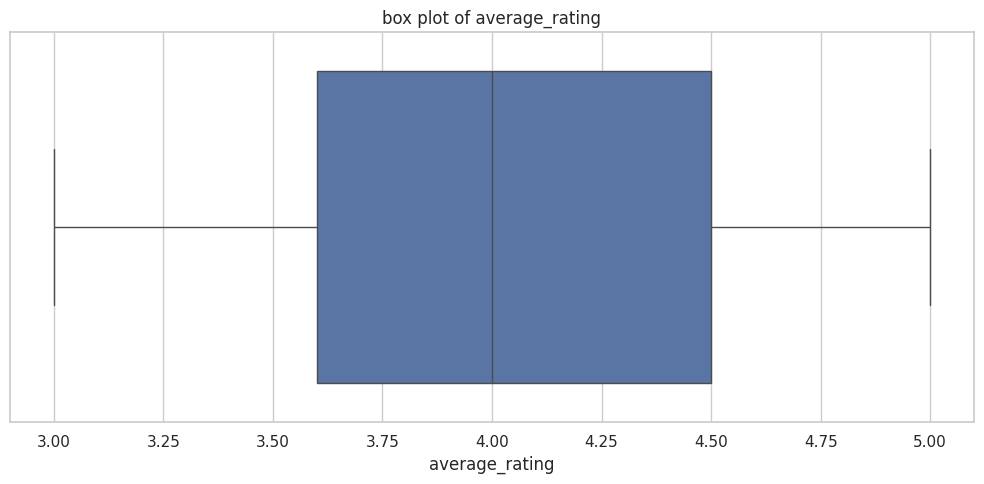

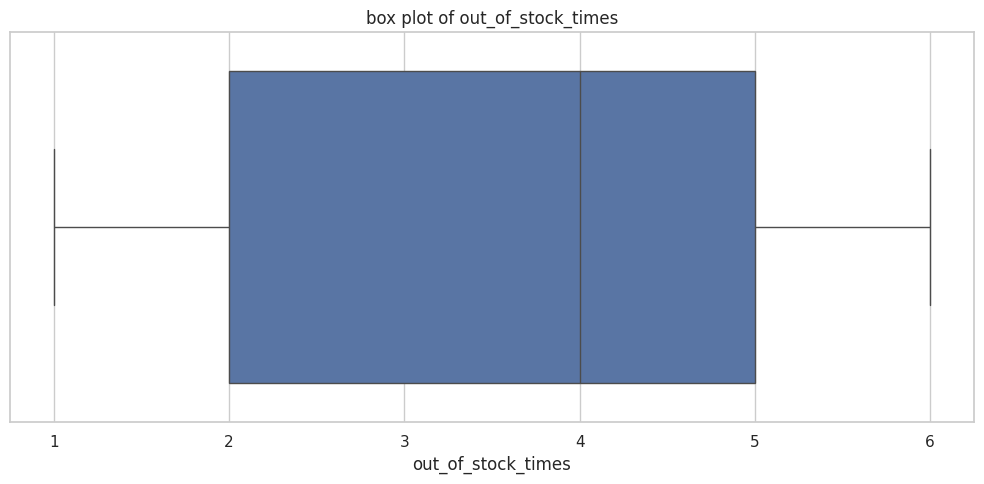

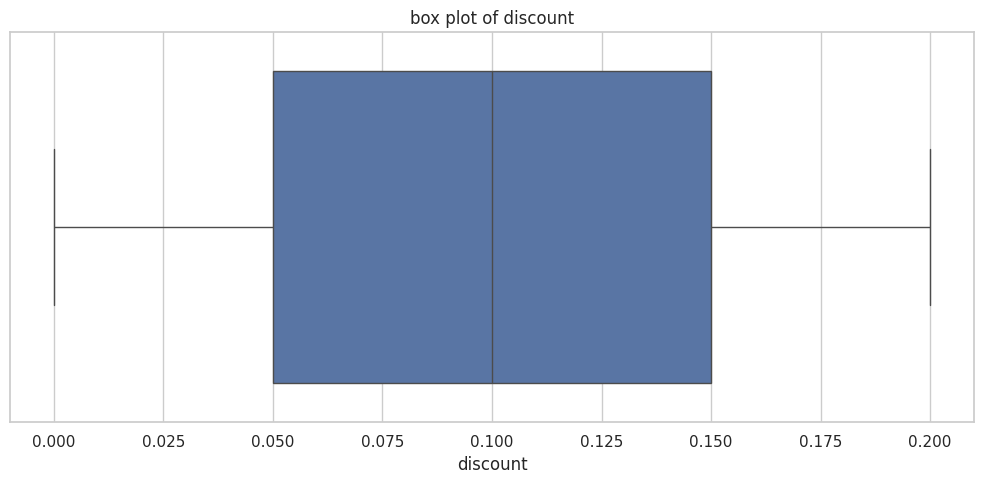

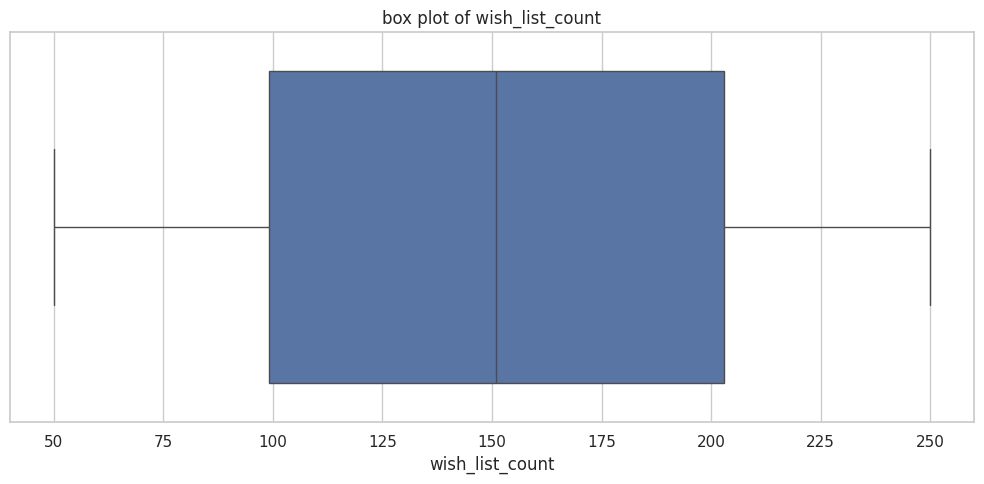

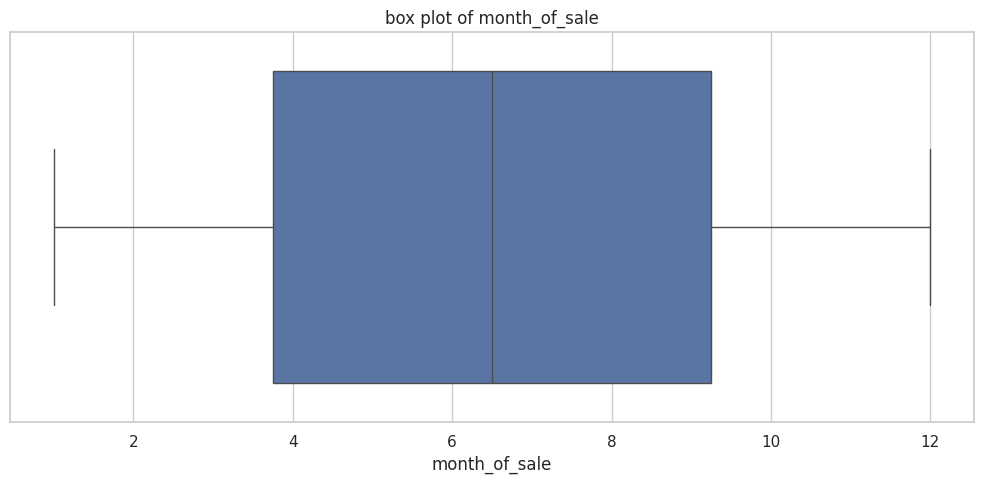

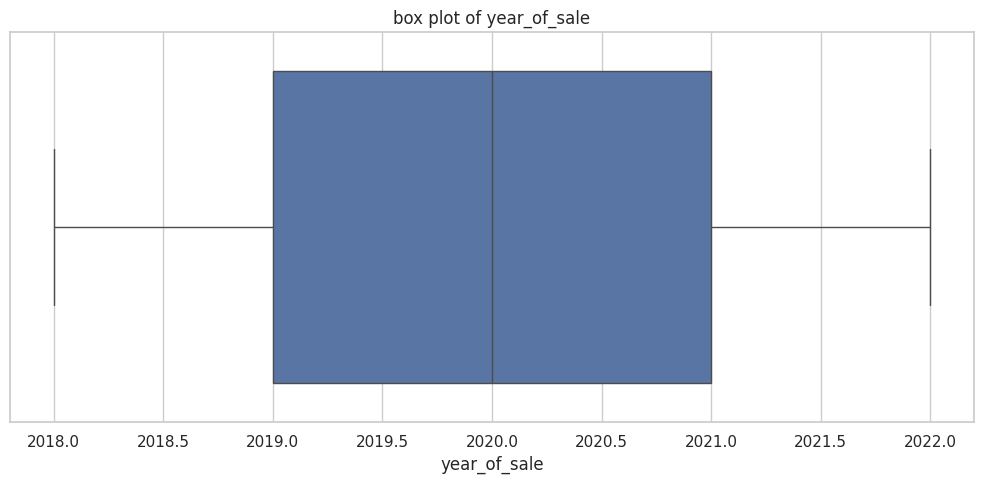

In [1987]:
#boxplot for numerical columns
for col in numerical:
  plt.figure(figsize = (10,5))
  sns.boxplot(x = df[col])
  plt.title(f'box plot of {col}')
  plt.tight_layout()
  plt.show()


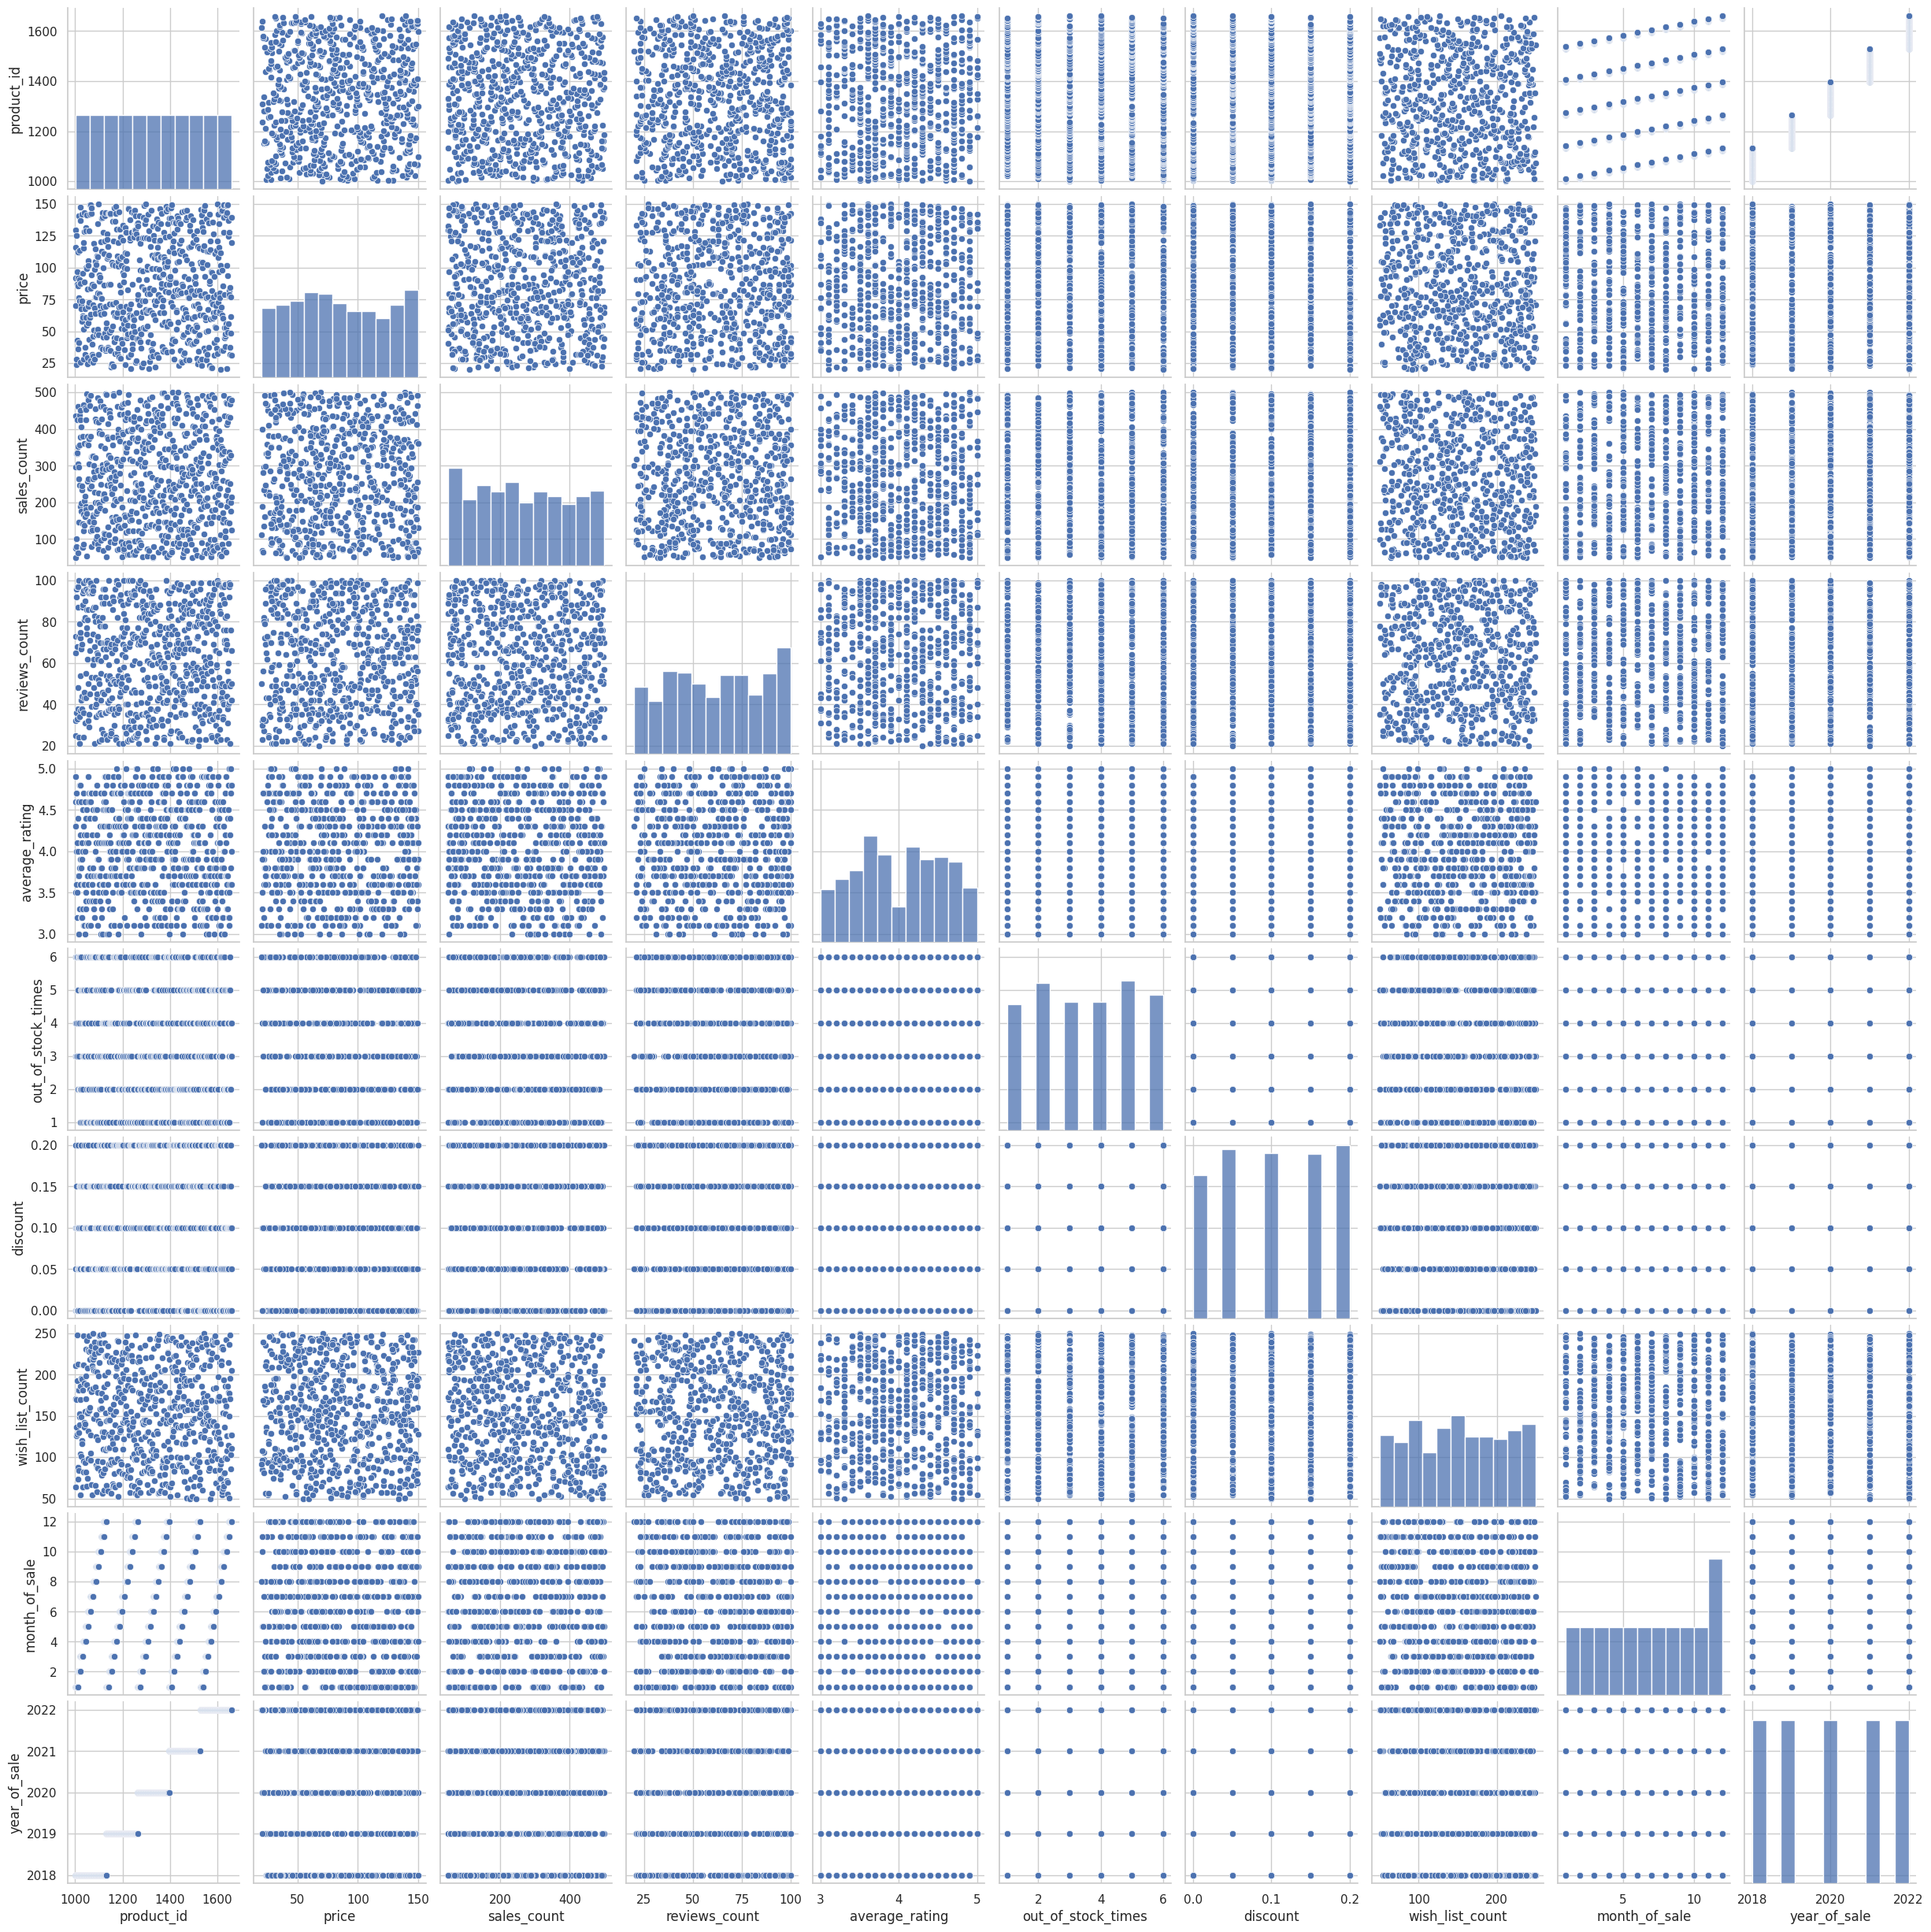

In [1988]:
#pair plot for numerical columns
sns.pairplot(numerical)
plt.show()

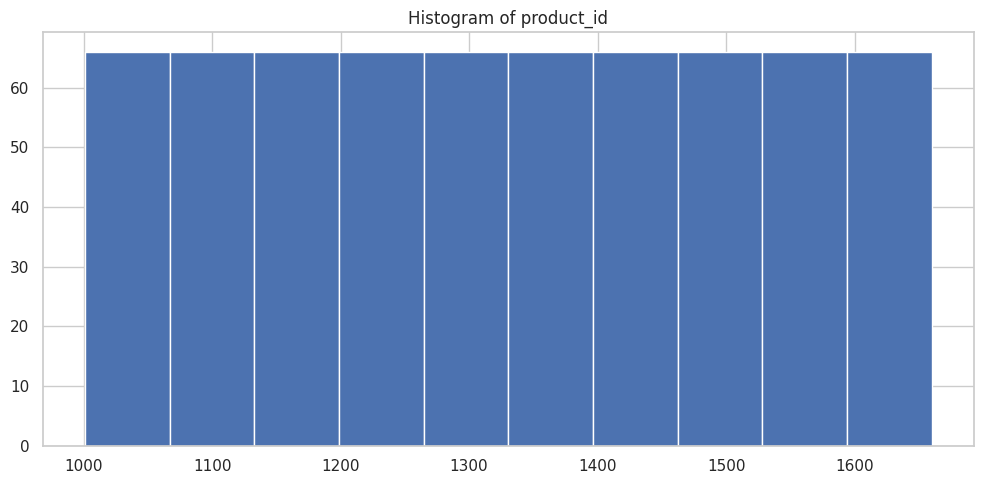

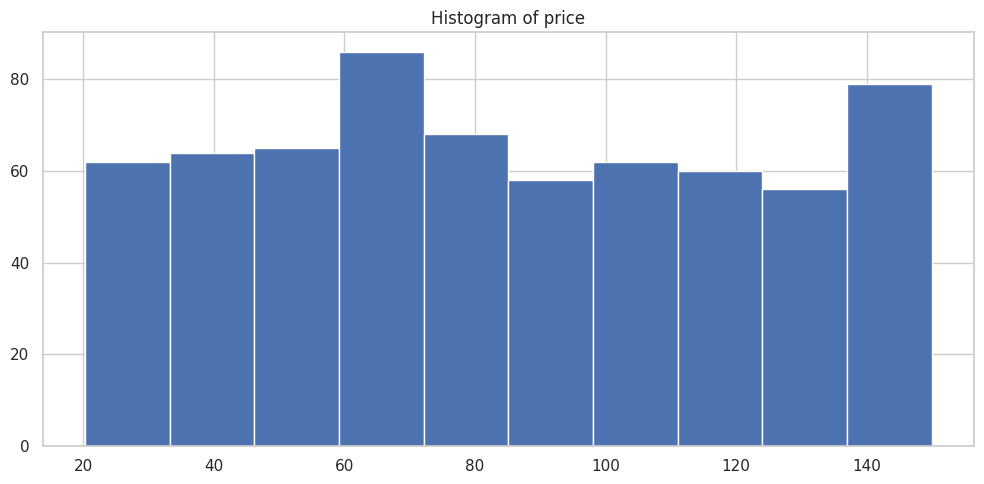

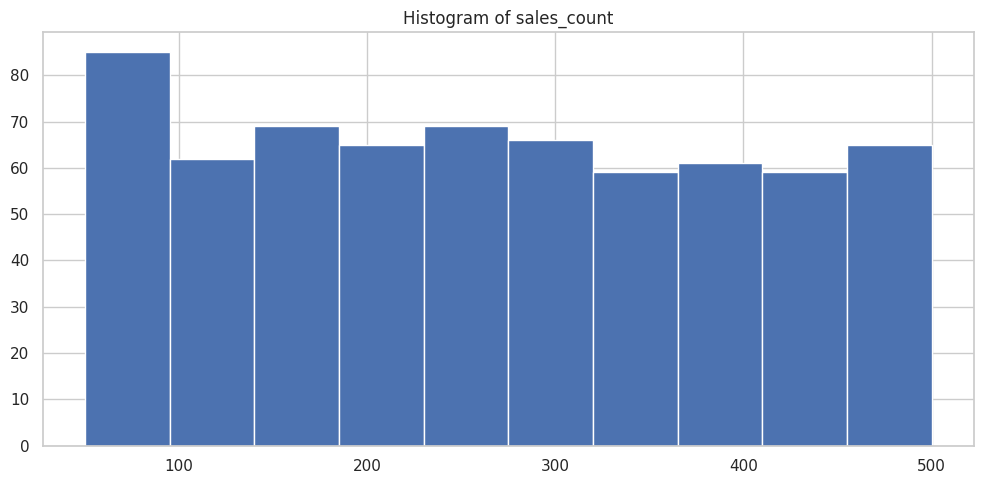

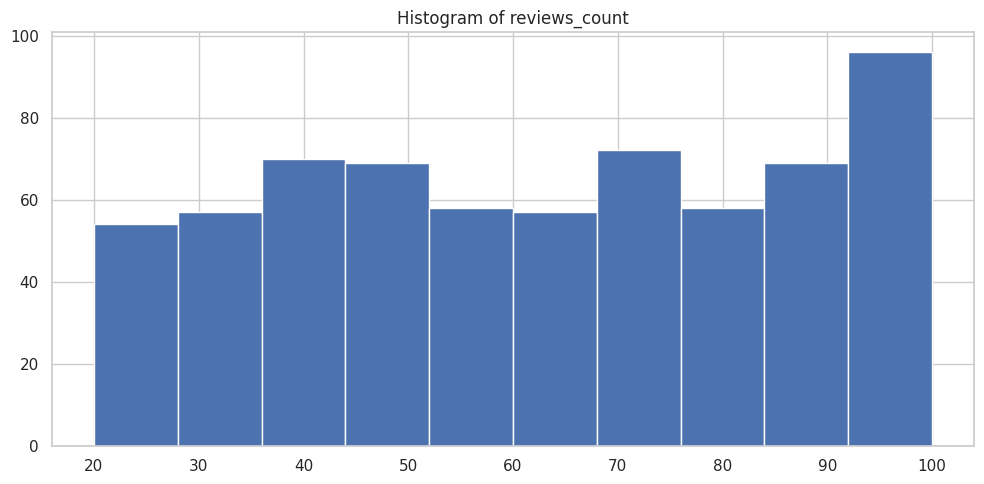

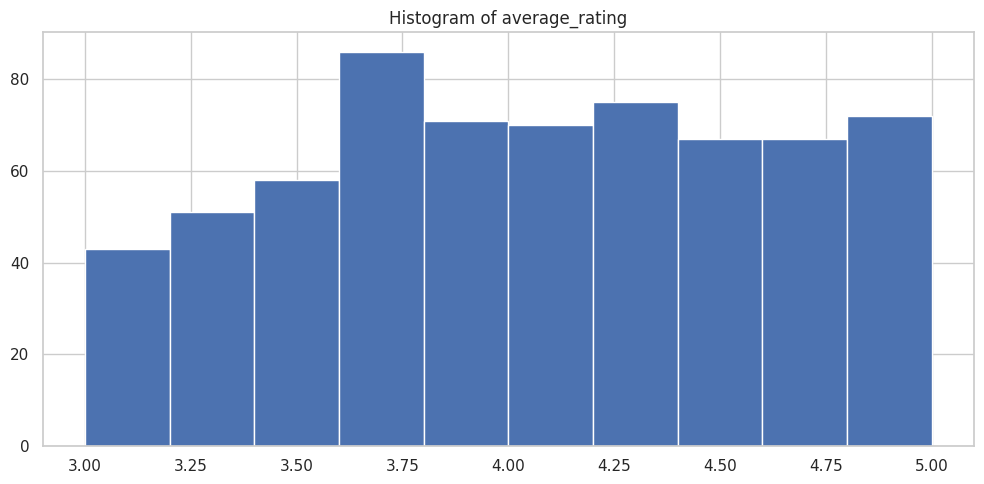

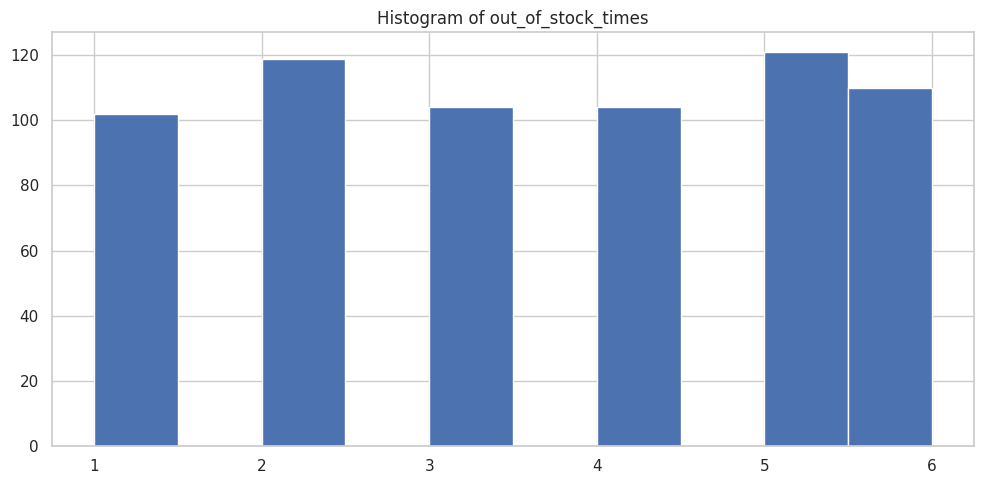

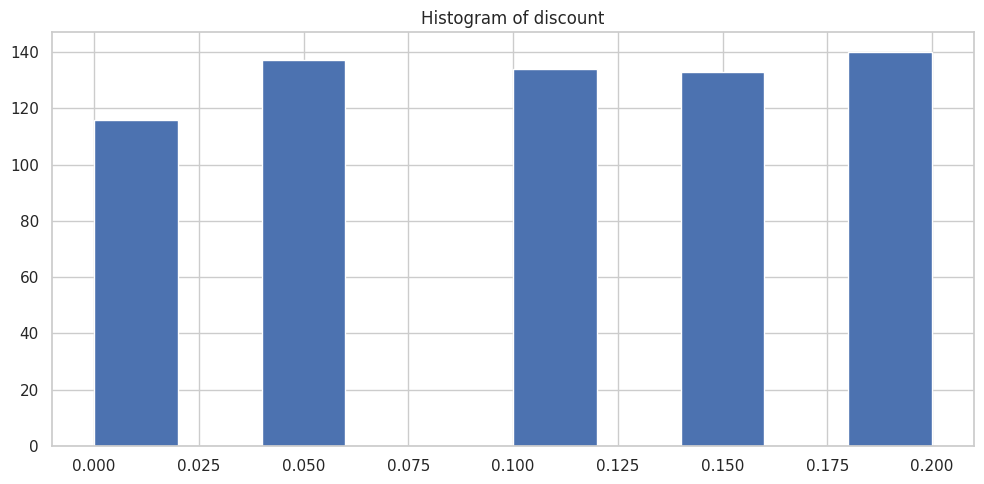

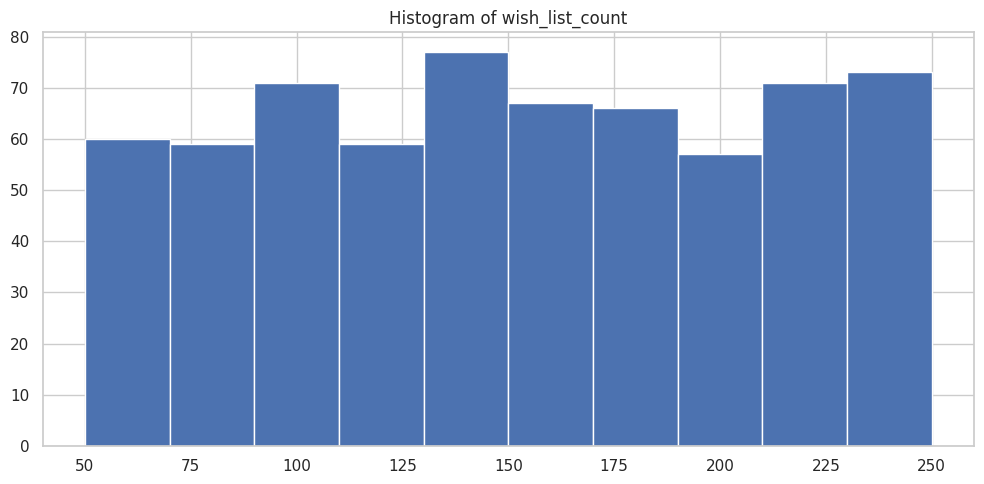

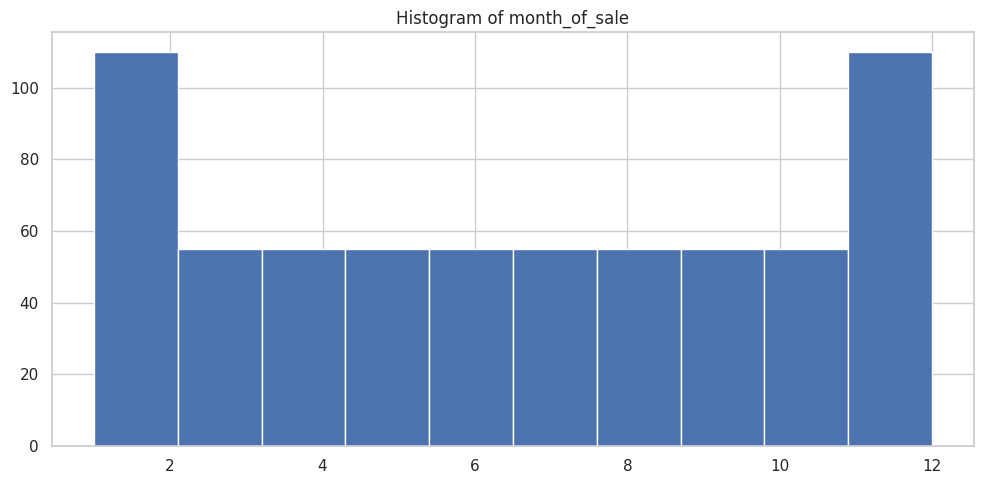

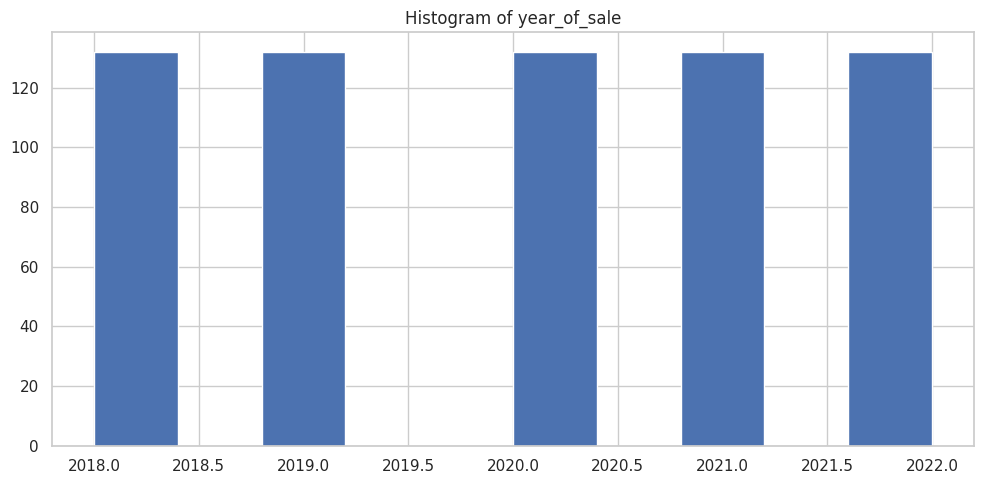

In [1989]:
#histograms for the numerical data
for col in numerical:
  plt.figure(figsize = (10,5))
  df[col].hist()
  plt.title(f'Histogram of {col}')
  plt.tight_layout()
  plt.show()

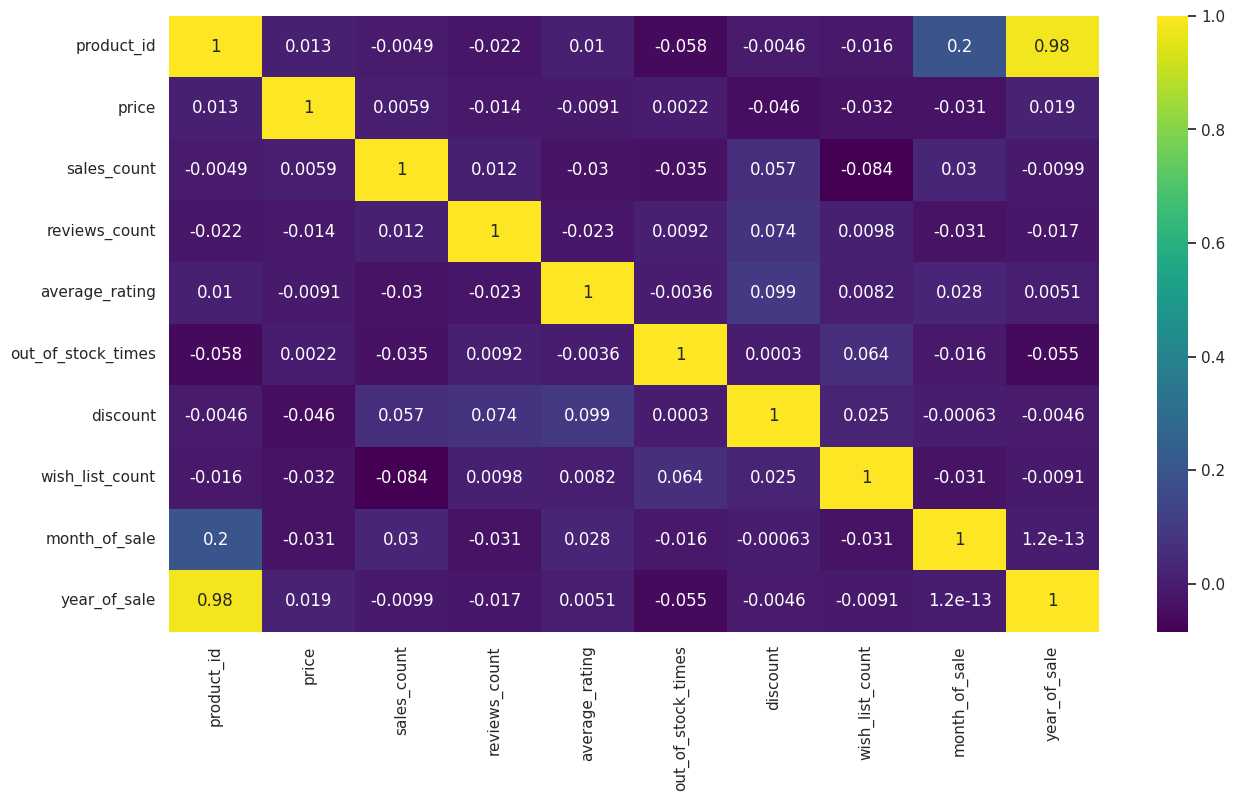

In [1990]:
#heatmap for numerical columns
plt.figure(figsize = (15,8))
sns.heatmap(numerical.corr(), annot = True, cmap = 'viridis')
plt.show()

In [1991]:
df.columns

Index(['product_id', 'product_name', 'gender', 'category', 'pattern', 'color',
       'age_group', 'season', 'price', 'material', 'sales_count',
       'reviews_count', 'average_rating', 'out_of_stock_times', 'brand',
       'discount', 'last_stock_date', 'wish_list_count', 'month_of_sale',
       'year_of_sale'],
      dtype='object')

In [1992]:
len(df['product_id'].unique())

660

In [1993]:
categorical.head()

product_name  gender category     pattern  color age_group  season  \
0    Biker Jacket    Male    Shirt   Geometric  White     25-35  Spring   
1  Business Shirt    Male   Jacket  Polka Dots  Beige     18-24  Summer   
2     Wool Jacket  Female    Dress   Geometric  Brown     18-24     All   
3    Summer Dress    Male   Shorts       Plain  White     25-35     All   
4    Casual Jeans    Male    Shirt       Plain  Beige     35-45  Winter   

    material brand  
0  Synthetic  ZARA  
1       Wool  ZARA  
2       Wool  ZARA  
3     Cotton  ZARA  
4    Viscose  ZARA

In [1994]:
len(categorical['product_name'])

660

In [1995]:
y = categorical['category']
categorical.drop('product_name',axis =1, inplace = True)
categorical.drop('category',axis =1, inplace = True)

In [1996]:
categorical.head()

gender     pattern  color age_group  season   material brand
0    Male   Geometric  White     25-35  Spring  Synthetic  ZARA
1    Male  Polka Dots  Beige     18-24  Summer       Wool  ZARA
2  Female   Geometric  Brown     18-24     All       Wool  ZARA
3    Male       Plain  White     25-35     All     Cotton  ZARA
4    Male       Plain  Beige     35-45  Winter    Viscose  ZARA

In [1997]:
# get dummies for entire categorical data
categorical = pd.get_dummies(categorical, drop_first = True)

In [1998]:
categorical.head()

gender_Male  pattern_Geometric  pattern_Heart  pattern_Plain  \
0         True               True          False          False   
1         True              False          False          False   
2        False               True          False          False   
3         True              False          False           True   
4         True              False          False           True   

   pattern_Polka Dots  pattern_Striped  color_Black  color_Brown  color_Green  \
0               False            False        False        False        False   
1                True            False        False        False        False   
2               False            False        False         True        False   
3               False            False        False        False        False   
4               False            False        False        False        False   

   color_Grey  ...  season_Autumn  season_Spring  season_Summer  \
0       False  ...          False           True          False   
1       False  ...          False          False           True   
2       False  ...          False          False          False   
3       False  ...          False          False          False   
4       False  ...          False          False          False   

   season_Winter  material_Cotton Blend  material_Denim  material_Leather  \
0          False                  False           False             False   
1          False                  False           False             False   
2          False                  False           False             False   
3          False                  False           False             False   
4           True                  False           False             False   

   material_Synthetic  material_Viscose  material_Wool  
0                True             False          False  
1               False             False           True  
2               False             False           True  
3               False             False          False  
4               False              True          False  

[5 rows x 29 columns]

In [1999]:
# map True and False in categorical to 1 and 0
for col in categorical.columns:
  if categorical[col].dtype == bool:
    categorical[col] = categorical[col].map({True: 1, False: 0})


In [2000]:
categorical.head()

gender_Male  pattern_Geometric  pattern_Heart  pattern_Plain  \
0            1                  1              0              0   
1            1                  0              0              0   
2            0                  1              0              0   
3            1                  0              0              1   
4            1                  0              0              1   

   pattern_Polka Dots  pattern_Striped  color_Black  color_Brown  color_Green  \
0                   0                0            0            0            0   
1                   1                0            0            0            0   
2                   0                0            0            1            0   
3                   0                0            0            0            0   
4                   0                0            0            0            0   

   color_Grey  ...  season_Autumn  season_Spring  season_Summer  \
0           0  ...              0              1              0   
1           0  ...              0              0              1   
2           0  ...              0              0              0   
3           0  ...              0              0              0   
4           0  ...              0              0              0   

   season_Winter  material_Cotton Blend  material_Denim  material_Leather  \
0              0                      0               0                 0   
1              0                      0               0                 0   
2              0                      0               0                 0   
3              0                      0               0                 0   
4              1                      0               0                 0   

   material_Synthetic  material_Viscose  material_Wool  
0                   1                 0              0  
1                   0                 0              1  
2                   0                 0              1  
3                   0                 0              0  
4                   0                 1              0  

[5 rows x 29 columns]

In [2001]:
# concat categorical and numerical dataframes
model_df = pd.concat([categorical, numerical], axis = 1)

In [2002]:
model_df.head()

gender_Male  pattern_Geometric  pattern_Heart  pattern_Plain  \
0            1                  1              0              0   
1            1                  0              0              0   
2            0                  1              0              0   
3            1                  0              0              1   
4            1                  0              0              1   

   pattern_Polka Dots  pattern_Striped  color_Black  color_Brown  color_Green  \
0                   0                0            0            0            0   
1                   1                0            0            0            0   
2                   0                0            0            1            0   
3                   0                0            0            0            0   
4                   0                0            0            0            0   

   color_Grey  ...  product_id   price  sales_count  reviews_count  \
0           0  ...        1001   70.36           75             65   
1           0  ...        1002   91.59          296             25   
2           0  ...        1003  129.52           50             32   
3           0  ...        1004  116.01          435             73   
4           0  ...        1005  125.48           79             36   

   average_rating  out_of_stock_times  discount  wish_list_count  \
0             4.9                   3      0.20              211   
1             3.5                   6      0.00              211   
2             4.3                   4      0.05               64   
3             4.6                   3      0.10              171   
4             3.6                   4      0.00              126   

   month_of_sale  year_of_sale  
0              1          2018  
1              1          2018  
2              1          2018  
3              1          2018  
4              1          2018  

[5 rows x 39 columns]

In [2003]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender_Male            660 non-null    int64  
 1   pattern_Geometric      660 non-null    int64  
 2   pattern_Heart          660 non-null    int64  
 3   pattern_Plain          660 non-null    int64  
 4   pattern_Polka Dots     660 non-null    int64  
 5   pattern_Striped        660 non-null    int64  
 6   color_Black            660 non-null    int64  
 7   color_Brown            660 non-null    int64  
 8   color_Green            660 non-null    int64  
 9   color_Grey             660 non-null    int64  
 10  color_Navy Blue        660 non-null    int64  
 11  color_Orange           660 non-null    int64  
 12  color_Pink             660 non-null    int64  
 13  color_Red              660 non-null    int64  
 14  color_Sky Blue         660 non-null    int64  
 15  color_

In [2004]:
model_df.isnull().sum()

gender_Male              0
pattern_Geometric        0
pattern_Heart            0
pattern_Plain            0
pattern_Polka Dots       0
pattern_Striped          0
color_Black              0
color_Brown              0
color_Green              0
color_Grey               0
color_Navy Blue          0
color_Orange             0
color_Pink               0
color_Red                0
color_Sky Blue           0
color_White              0
color_Yellow             0
age_group_25-35          0
age_group_35-45          0
season_Autumn            0
season_Spring            0
season_Summer            0
season_Winter            0
material_Cotton Blend    0
material_Denim           0
material_Leather         0
material_Synthetic       0
material_Viscose         0
material_Wool            0
product_id               0
price                    0
sales_count              0
reviews_count            0
average_rating           0
out_of_stock_times       0
discount                 0
wish_list_count          0
month_of_sale            0
year_of_sale             0
dtype: int64

In [2005]:

X = model_df.drop('product_id', axis =1)

In [2006]:
X.head()

gender_Male  pattern_Geometric  pattern_Heart  pattern_Plain  \
0            1                  1              0              0   
1            1                  0              0              0   
2            0                  1              0              0   
3            1                  0              0              1   
4            1                  0              0              1   

   pattern_Polka Dots  pattern_Striped  color_Black  color_Brown  color_Green  \
0                   0                0            0            0            0   
1                   1                0            0            0            0   
2                   0                0            0            1            0   
3                   0                0            0            0            0   
4                   0                0            0            0            0   

   color_Grey  ...  material_Wool   price  sales_count  reviews_count  \
0           0  ...              0   70.36           75             65   
1           0  ...              1   91.59          296             25   
2           0  ...              1  129.52           50             32   
3           0  ...              0  116.01          435             73   
4           0  ...              0  125.48           79             36   

   average_rating  out_of_stock_times  discount  wish_list_count  \
0             4.9                   3      0.20              211   
1             3.5                   6      0.00              211   
2             4.3                   4      0.05               64   
3             4.6                   3      0.10              171   
4             3.6                   4      0.00              126   

   month_of_sale  year_of_sale  
0              1          2018  
1              1          2018  
2              1          2018  
3              1          2018  
4              1          2018  

[5 rows x 38 columns]

In [2007]:
y.head()

0     Shirt
1    Jacket
2     Dress
3    Shorts
4     Shirt
Name: category, dtype: object

In [2008]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [2009]:
X = pd.DataFrame(X, columns = model_df.drop('product_id', axis = 1).columns)

In [2010]:
X.head()

gender_Male  pattern_Geometric  pattern_Heart  pattern_Plain  \
0          1.0                1.0            0.0            0.0   
1          1.0                0.0            0.0            0.0   
2          0.0                1.0            0.0            0.0   
3          1.0                0.0            0.0            1.0   
4          1.0                0.0            0.0            1.0   

   pattern_Polka Dots  pattern_Striped  color_Black  color_Brown  color_Green  \
0                 0.0              0.0          0.0          0.0          0.0   
1                 1.0              0.0          0.0          0.0          0.0   
2                 0.0              0.0          0.0          1.0          0.0   
3                 0.0              0.0          0.0          0.0          0.0   
4                 0.0              0.0          0.0          0.0          0.0   

   color_Grey  ...  material_Wool     price  sales_count  reviews_count  \
0         0.0  ...            0.0  0.386413     0.055556         0.5625   
1         0.0  ...            1.0  0.550123     0.546667         0.0625   
2         0.0  ...            1.0  0.842613     0.000000         0.1500   
3         0.0  ...            0.0  0.738433     0.855556         0.6625   
4         0.0  ...            0.0  0.811459     0.064444         0.2000   

   average_rating  out_of_stock_times  discount  wish_list_count  \
0            0.95                 0.4      1.00            0.805   
1            0.25                 1.0      0.00            0.805   
2            0.65                 0.6      0.25            0.070   
3            0.80                 0.4      0.50            0.605   
4            0.30                 0.6      0.00            0.380   

   month_of_sale  year_of_sale  
0            0.0           0.0  
1            0.0           0.0  
2            0.0           0.0  
3            0.0           0.0  
4            0.0           0.0  

[5 rows x 38 columns]

In [2011]:
from sklearn.cluster import KMeans
kmeans  = KMeans(n_clusters = 4, random_state = 0)
kmeans.fit(X)

KMeans(n_clusters=4, random_state=0)

In [2012]:
kmeans.cluster_centers_

array([[ 5.56213018e-01, -2.77555756e-16,  5.91715976e-03,
        -7.21644966e-16,  9.94082840e-01, -9.02056208e-17,
         1.52655666e-16,  2.48520710e-01,  2.95857988e-02,
         4.73372781e-02,  1.18343195e-02, -8.32667268e-17,
         6.50887574e-02,  1.00591716e-01,  2.42861287e-17,
         3.07692308e-01, -5.55111512e-17,  2.89940828e-01,
         3.66863905e-01,  2.24852071e-01,  2.01183432e-01,
         1.53846154e-01,  2.18934911e-01,  1.42011834e-01,
         1.77514793e-01,  1.83431953e-01,  1.53846154e-01,
         1.12426036e-01,  8.87573964e-02,  5.43151280e-01,
         4.61130835e-01,  4.85355030e-01,  4.90828402e-01,
         5.11242604e-01,  5.10355030e-01,  4.93017751e-01,
         4.59386767e-01,  5.26627219e-01],
       [ 5.14563107e-01,  1.00000000e+00, -3.81639165e-17,
        -4.99600361e-16, -8.88178420e-16, -9.02056208e-17,
         1.24900090e-16,  1.94174757e-01,  2.91262136e-02,
         4.36893204e-02,  3.88349515e-02, -7.63278329e-17,
         1.52

In [2013]:
kmeans.inertia_

2393.4443250488093

In [2014]:
y.head()

0     Shirt
1    Jacket
2     Dress
3    Shorts
4     Shirt
Name: category, dtype: object

In [2015]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [2016]:
labels = kmeans.labels_

correct_labels = sum( y == labels)

print("Result: %d out of %d samples were correctly labeled." %(correct_labels, y.size))




# The following lines are commented out because comparing KMeans labels directly to the input data (y) in this manner is not a standard way to evaluate clustering performance unless 'y' contains true ground truth labels.
# correct_labels = sum(y == labels)
# total_labels = len(y)

# print(f"Result: {correct_labels} out of {total_labels} is correct")

Result: 69 out of 660 samples were correctly labeled.


In [2017]:
print('Accuracy score: {0:0.2f}'.format(accuracy_score(y, labels)))

Accuracy score: 0.10
